<a href="https://colab.research.google.com/github/envirodatascience/final-project-trashpandas/blob/main/TrashPandas_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Objectives



**Research Question: What are factors that might correlate with various waste generation trends?**

# Import packages



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# geo
import geopandas as gpd

# plotting
from plotnine import *
import plotnine

import matplotlib.pyplot as plt

In [ ]:
# for fuzzy matching

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning


In [ ]:
import re

In [ ]:
# for statistics

import scipy.stats as stats

# Waste Data

In [ ]:
# First we will read in city-level waste data from the What a Waste website

In [ ]:
city_url = "https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/WAW_city_level_data.csv"
df_city = pd.read_csv(city_url)

df_city.head()

iso3c region_id country_name income_id       city_name  \
0   AFG       SAS  Afghanistan       LIC       Jalalabad   
1   AFG       SAS  Afghanistan       LIC        Kandahar   
2   AFG       SAS  Afghanistan       LIC  Mazar-E-Sharif   
3   AFG       SAS  Afghanistan       LIC           Kabul   
4   AFG       SAS  Afghanistan       LIC         HiratÂ    

  additional_data_annual_budget_for_waste_management_year  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  additional_data_annual_solid_waste_budget_year  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   additional_data_annual_swm_budget_2017_year  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   additional_data_annual_swm_budget_year  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   additional_data_annual_waste_budget_year  ...  \
0                                       NaN  ...   
1                                       NaN  ...   
2                                       NaN  ...   
3                                       NaN  ...   
4                                       NaN  ...   

   waste_treatment_compost_percent  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

   waste_treatment_controlled_landfill_percent  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  waste_treatment_incineration_percent  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  waste_treatment_landfill_unspecified_percent  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  waste_treatment_open_dump_percent  waste_treatment_other_percent  \
0                             100.0                            NaN   
1                             100.0                            NaN   
2                             100.0                            NaN   
3                              75.0                            NaN   
4                             100.0                            NaN   

   waste_treatment_recycling_percent  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

   waste_treatment_sanitary_landfill_landfill_gas_system_percent  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN      

In [ ]:
df_city.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 113 columns):
 #    Column                                                                                                                                  Dtype  
---   ------                                                                                                                                  -----  
 0    iso3c                                                                                                                                   object 
 1    region_id                                                                                                                               object 
 2    country_name                                                                                                                            object 
 3    income_id                                                                                                                               ob

In [ ]:
# Next, we will read in the country-level waste data from the What a Waste website

In [ ]:
country_url = "https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/WAW_country_level_data.csv"

df_country = pd.read_csv(country_url)
df_country.head()

iso3c region_id country_name income_id           gdp  \
0   ABW       LCN        Aruba       HIC  35563.312500   
1   AFG       SAS  Afghanistan       LIC   2057.062256   
2   AGO       SSF       Angola       LMC   8036.690430   
3   ALB       ECS      Albania       UMC  13724.058594   
4   AND       ECS      Andorra       HIC  43711.800781   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  ...  \
0                                  NaN  ...   
1                                  NaN  ...   
2                                 11.9  ...   
3                                  9.9  ...   
4                                 35.1  ...   

   waste_treatment_controlled_landfill_percent  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   waste_treatment_incineration_percent  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                  52.1   

   waste_treatment_landfill_unspecified_percent  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   waste_treatment_open_dump_percent waste_treatment_other_percent  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

  waste_treatment_recycling_percent  \
0                              11.0   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

  waste_treatment_sanitary_landfill_landfill_gas_system_percent  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

  waste_treatment_unaccounted_for_percent  \
0                                    89.0   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                    47.9   

  waste_treatment_waterways_marine_percent  where_where_is_this_data_measured  
0                                      NaN                                NaN  
1                                      NaN                              Other  
2                                      NaN                                NaN  
3                                      NaN                Some di

In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 51 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   iso3c                                                                                  217 non-null    object 
 1   region_id                                                                              217 non-null    object 
 2   country_name                                                                           216 non-null    object 
 3   income_id                                                                              217 non-null    object 
 4   gdp                                                                                    216 non-null    float64
 5   composition_food_organic_waste_percent                                        

In [ ]:
# Now we'll read in country-level recycling rate data

In [ ]:
recyc_rate_url = "https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/EPI_recycling_rates.csv"
df_recycling_rate = pd.read_csv(recyc_rate_url)

df_recycling_rate.head()

Country  Rank  EPI Score  10-Year Change
0  South Korea     1       67.1             1.2
1        Samoa     2       57.6             1.2
2        Benin     3       56.9             2.3
3      Iceland     4       55.5             0.4
4    Australia     5       52.9             0.6

In [ ]:
df_recycling_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         180 non-null    object 
 1   Rank            180 non-null    int64  
 2   EPI Score       180 non-null    float64
 3   10-Year Change  172 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.8+ KB


# Independent Variables

Now we will read in our data for our three independent variables:
*   GDP
*   Urban vs. Rural Populations
*   Gender Score



**GROSS DOMESTIC PRODUCT (GDP)**

In [ ]:
# To analyze GDP, we'll start by reading in data about country-level GDP from the World Bank website

In [ ]:
gdp_url = "https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26.csv"

df_gdp = pd.read_csv(gdp_url)
df_gdp.head()

Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  1.847810e+10  1.936631e+10  2.050647e+10  2.224273e+10   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.041165e+10  1.113592e+10  1.195171e+10  1.268581e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2014          2015          2016  \
0           NaN           NaN  ...  2.790850e+09  2.962907e+09  2.983635e+09   
1  2.429433e+10  2.661956e+10  ...  1.006990e+12  9.325130e+11  8.900510e+11   
2  8.000000e+08  1.006667e+09  ...  2.049713e+10  1.913422e+10  1.811657e+10   
3  1.384900e+10  1.487476e+10  ...  8.945050e+11  7.692630e+11  6.921150e+11   
4           NaN           NaN  ...  1.359670e+11  9.049642e+10  5.276162e+10   

           2017          2018          2019          2020          2021  \
0  3.092429e+09  3.276184e+09  3.395799e+09  2.558906e+09  3.103184e+09   
1  1.028390e+12  1.012520e+12  1.006190e+12  9.288800e+11  1.086530e+12   
2  1.875346e+10  1.805322e+10  1.879944e+10  1.995593e+10  1.426650e+10   
3  6.856300e+11  7.681580e+11  8.234060e+11  7.869620e+11  8.449280e+11   
4  7.369016e+10  7.945069e+10  7.089796e+10  4.850156e+10  6.650513e+10   

           2022  2023  
0  3.544708e+09   NaN  
1  1.185140e+12   NaN  
2           NaN   NaN  
3  8.753940e+11   NaN  
4  1.067830e+11   NaN  

[5 rows x 68 columns]

In [ ]:
# Let's take a look at our data
# I want to be sure to identify gaps/null values

df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            126 non-null    float64
 5   1961            127 non-null    float64
 6   1962            128 non-null    float64
 7   1963            128 non-null    float64
 8   1964            128 non-null    float64
 9   1965            140 non-null    float64
 10  1966            143 non-null    float64
 11  1967            146 non-null    float64
 12  1968            151 non-null    float64
 13  1969            151 non-null    float64
 14  1970            160 non-null    float64
 15  1971            163 non-null    float64
 16  1972            163 non-null    float64
 17  1973            163 non-null    flo

In [ ]:
# It looks like there are more null values in earlier years
# We'll focus our analysis on the most recent year for which we have good data
# This appears to be 2021 since we have 255 non-null values for that year

In [ ]:
# We'll simplify our dataframe to include just this year's GDP data
df_gdp_clean = df_gdp[["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2021"]]
df_gdp_clean.head(5)

Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          2021  
0  NY.GDP.MKTP.CD  3.103184e+09  
1  NY.GDP.MKTP.CD  1.086530e+12  
2  NY.GDP.MKTP.CD  1.426650e+10  
3  NY.GDP.MKTP.CD  8.449280e+11  
4  NY.GDP.MKTP.CD  6.650513e+10

In [ ]:
# Let's see if we can simplify our dataframe more

df_gdp_clean.nunique()

Country Name      266
Country Code      266
Indicator Name      1
Indicator Code      1
2021              253
dtype: int64

In [ ]:
# Let's go ahead and remove the "Indicator Name" and "Indicator Code" columns since they are the same for each country

In [ ]:
df_gdp_clean = df_gdp[["Country Name", "Country Code", "2021"]]
df_gdp_clean.head(5)

Country Name Country Code          2021
0                        Aruba          ABW  3.103184e+09
1  Africa Eastern and Southern          AFE  1.086530e+12
2                  Afghanistan          AFG  1.426650e+10
3   Africa Western and Central          AFW  8.449280e+11
4                       Angola          AGO  6.650513e+10

In [ ]:
# Let's also rename the "2021"a column to be "2021 GDP (current US$)"
# Since we will combine all our data into one dataframe later, it will help to have descriptive column names

df_gdp_clean.rename(columns = {"2021": "2021 GDP (current US$)"})

Country Name Country Code  2021 GDP (current US$)
0                          Aruba          ABW            3.103184e+09
1    Africa Eastern and Southern          AFE            1.086530e+12
2                    Afghanistan          AFG            1.426650e+10
3     Africa Western and Central          AFW            8.449280e+11
4                         Angola          AGO            6.650513e+10
..                           ...          ...                     ...
261                       Kosovo          XKX            9.412034e+09
262                  Yemen, Rep.          YEM                     NaN
263                 South Africa          ZAF            4.201180e+11
264                       Zambia          ZMB            2.209642e+10
265                     Zimbabwe          ZWE            2.837124e+10

[266 rows x 3 columns]

In [ ]:
df_gdp_clean = df_gdp_clean.rename(columns = {"2021": "2021 GDP (current US$)"})

In [ ]:
df_gdp_clean.head(5)

Country Name Country Code  2021 GDP (current US$)
0                        Aruba          ABW            3.103184e+09
1  Africa Eastern and Southern          AFE            1.086530e+12
2                  Afghanistan          AFG            1.426650e+10
3   Africa Western and Central          AFW            8.449280e+11
4                       Angola          AGO            6.650513e+10

**RURAL VS. URBAN POPULATIONS**

In [ ]:
# To anaylze rural vs. urban populations, we'll first read in data about the rural/urban populations from Our World in Data

In [ ]:
urban_percent = "https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/Ayushi/share-of-population-urban.csv"
df_urban_share = pd.read_csv(urban_percent)

df_urban_share.head()

Entity Code  Year  Urban population (% of total population)
0  Afghanistan  AFG  1960                                     8.401
1  Afghanistan  AFG  1961                                     8.684
2  Afghanistan  AFG  1962                                     8.976
3  Afghanistan  AFG  1963                                     9.276
4  Afghanistan  AFG  1964                                     9.586

In [ ]:
# since we will want to combine our independent variables into one table, let's convert our data to the wide version
# to do this, we'll use the PIVOT function

In [ ]:
df_urban_share_clean = df_urban_share.pivot(index = ["Entity", "Code"],
                     columns = "Year",
                     values = "Urban population (% of total population)").reset_index()

df_urban_share_clean.head(5)

Year          Entity Code    1960    1961    1962    1963    1964    1965  \
0        Afghanistan  AFG   8.401   8.684   8.976   9.276   9.586   9.904   
1            Albania  ALB  30.705  30.943  31.015  31.086  31.158  31.230   
2            Algeria  DZA  30.510  31.797  33.214  34.662  36.141  37.643   
3     American Samoa  ASM  66.211  66.641  67.068  67.493  67.916  68.334   
4            Andorra  AND  58.450  60.983  63.462  65.872  68.205  70.445   

Year    1966    1967  ...    2012    2013    2014    2015    2016    2017  \
0     10.233  10.570  ...  24.160  24.373  24.587  24.803  25.020  25.250   
1     31.302  31.374  ...  54.330  55.387  56.423  57.434  58.421  59.383   
2     38.840  39.004  ...  68.915  69.576  70.221  70.848  71.459  72.052   
3     68.750  69.163  ...  87.420  87.348  87.288  87.238  87.198  87.170   
4     72.593  74.641  ...  88.631  88.537  88.441  88.345  88.248  88.150   

Year    2018    2019    2020    2021  
0     25.495  25.754  26.026  26.314  
1     60.319  61.229  62.112  62.969  
2     72.629  73.189  73.733  74.261  
3     87.153  87.147  87.153  87.169  
4     88.062  87.984  87.916  87.858  

[5 rows x 64 columns]

In [ ]:
# we will just use the most recent year for which we have good data
# let's check for data gaps/null values

In [ ]:
df_urban_share_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  229 non-null    object 
 1   Code    215 non-null    object 
 2   1960    229 non-null    float64
 3   1961    229 non-null    float64
 4   1962    229 non-null    float64
 5   1963    229 non-null    float64
 6   1964    229 non-null    float64
 7   1965    229 non-null    float64
 8   1966    229 non-null    float64
 9   1967    229 non-null    float64
 10  1968    229 non-null    float64
 11  1969    229 non-null    float64
 12  1970    229 non-null    float64
 13  1971    229 non-null    float64
 14  1972    229 non-null    float64
 15  1973    229 non-null    float64
 16  1974    229 non-null    float64
 17  1975    229 non-null    float64
 18  1976    229 non-null    float64
 19  1977    229 non-null    float64
 20  1978    229 non-null    float64
 21  1979    229 non-null    float64
 22  19

In [ ]:
# we'll use 2021 data for our analysis (most recent year for which we have good data)
# let's clean up our dataframe further to just include 2021

In [ ]:
df_urban_share_clean[["Entity", "Code", 2021]]

Year          Entity      Code       2021
0        Afghanistan       AFG  26.314000
1            Albania       ALB  62.969000
2            Algeria       DZA  74.261000
3     American Samoa       ASM  87.169000
4            Andorra       AND  87.858000
..               ...       ...        ...
224          Vietnam       VNM  38.052000
225            World  OWID_WRL  56.477543
226            Yemen       YEM  38.546000
227           Zambia       ZMB  45.192000
228         Zimbabwe       ZWE  32.303000

[229 rows x 3 columns]

In [ ]:
df_urban_share_clean = df_urban_share_clean[["Entity", "Code", 2021]]

In [ ]:
df_urban_share_clean.head(5)

Year          Entity Code    2021
0        Afghanistan  AFG  26.314
1            Albania  ALB  62.969
2            Algeria  DZA  74.261
3     American Samoa  ASM  87.169
4            Andorra  AND  87.858

In [ ]:
# let's rename the column from "Entity" to "Country Name"
# We will use this column name as our KEY when we eventually merge dataframes together

df_urban_share_clean = df_urban_share_clean.rename(columns = {"Entity": "Country Name"})
df_urban_share_clean.head(5)

Year    Country Name Code    2021
0        Afghanistan  AFG  26.314
1            Albania  ALB  62.969
2            Algeria  DZA  74.261
3     American Samoa  ASM  87.169
4            Andorra  AND  87.858

In [ ]:
# Now let's rename the column from "2021" to "% Urban Population (2021)"

df_urban_share_clean = df_urban_share_clean.rename(columns = {2021: "% Urban Population (2021)"})
df_urban_share_clean.head(5)

Year    Country Name Code  % Urban Population (2021)
0        Afghanistan  AFG                     26.314
1            Albania  ALB                     62.969
2            Algeria  DZA                     74.261
3     American Samoa  ASM                     87.169
4            Andorra  AND                     87.858

**GENDER**

In [ ]:
# We will pull in data on gender from the World Economic Forum

gender_url = "https://github.com/envirodatascience/final-project-trashpandas/raw/main/Global_Gender_Index.xlsx"
df_gender = pd.read_excel(gender_url)

df_gender.head()

Rank      Country  Score (0-1)  Score change
0     1      Iceland        0.912         0.004
1     2       Norway        0.879         0.034
2     3      Finland        0.863         0.003
3     4  New Zealand        0.856         0.014
4     5       Sweden        0.815        -0.007

In [ ]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          146 non-null    int64  
 1   Country       146 non-null    object 
 2   Score (0-1)   146 non-null    float64
 3   Score change  142 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
# Let's rename the gender score (0-1) to something that will be identifiable once we merge our dataframes

df_gender_clean = df_gender.rename(columns = {"Score (0-1)": "2023 Gender Score (0-1)"})
df_gender_clean.head(5)

Rank      Country  2023 Gender Score (0-1)  Score change
0     1      Iceland                    0.912         0.004
1     2       Norway                    0.879         0.034
2     3      Finland                    0.863         0.003
3     4  New Zealand                    0.856         0.014
4     5       Sweden                    0.815        -0.007


# Combining Data

In [ ]:
# Now we will merge our 3 independent variables into one dataframe

In [ ]:
# Since some of our Country names might not be consistent, we'll start with an OUTER JOIN function
# this will ensure that we do not lose rows if the country names don't match perfectly

In [ ]:
df_gdp_clean.merge(df_urban_share_clean, how = "outer", on = "Country Name", indicator = True)

Country Name Country Code  2021 GDP (current US$) Code  \
0                            Aruba          ABW            3.103184e+09  ABW   
1      Africa Eastern and Southern          AFE            1.086530e+12  NaN   
2                      Afghanistan          AFG            1.426650e+10  AFG   
3       Africa Western and Central          AFW            8.449280e+11  NaN   
4                           Angola          AGO            6.650513e+10  AGO   
..                             ...          ...                     ...  ...   
303   United States Virgin Islands          NaN                     NaN  VIR   
304  Upper-middle-income countries          NaN                     NaN  NaN   
305                      Venezuela          NaN                     NaN  VEN   
306                        Vietnam          NaN                     NaN  VNM   
307                          Yemen          NaN                     NaN  YEM   

     % Urban Population (2021)      _merge  
0                     43.86600        both  
1                          NaN   left_only  
2                     26.31400        both  
3                          NaN   left_only  
4                     67.46000        both  
..                         ...         ...  
303                   96.04000  right_only  
304                   68.37537  right_only  
305                   88.32500  right_only  
306                   38.05200  right_only  
307                   38.54600  right_only  

[308 rows x 6 columns]

In [ ]:
# we'll save this new dataframe as df_combined

In [ ]:
df_combined = df_gdp_clean.merge(df_urban_share_clean, how = "outer", on = "Country Name", indicator = True)

In [ ]:
# let's check how our merge looks
# we want to see how many were matches vs not matched based on our key

df_combined._merge.value_counts()

_merge
both          187
left_only      79
right_only     42
Name: count, dtype: int64

In [ ]:
# we'll check where the mis-matches are coming from
df_combined[df_combined._merge == "left_only"]

Country Name Country Code  2021 GDP (current US$) Code  \
1    Africa Eastern and Southern          AFE            1.086530e+12  NaN   
3     Africa Western and Central          AFW            8.449280e+11  NaN   
7                     Arab World          ARB            2.930480e+12  NaN   
23                  Bahamas, The          BHS            1.152760e+10  NaN   
31             Brunei Darussalam          BRN            1.400650e+10  NaN   
..                           ...          ...                     ...  ...   
254                Venezuela, RB          VEN                     NaN  NaN   
256        Virgin Islands (U.S.)          VIR            4.444000e+09  NaN   
257                     Viet Nam          VNM            3.661380e+11  NaN   
261                       Kosovo          XKX            9.412034e+09  NaN   
262                  Yemen, Rep.          YEM                     NaN  NaN   

     % Urban Population (2021)     _merge  
1                          NaN  left_only  
3                          NaN  left_only  
7                          NaN  left_only  
23                         NaN  left_only  
31                         NaN  left_only  
..                         ...        ...  
254                        NaN  left_only  
256                        NaN  left_only  
257                        NaN  left_only  
261                        NaN  left_only  
262                        NaN  left_only  

[79 rows x 6 columns]

In [ ]:
df_combined[df_combined._merge == "right_only"]

Country Name Country Code  2021 GDP (current US$)  \
266                            Bahamas          NaN                     NaN   
267                             Brunei          NaN                     NaN   
268                         Cape Verde          NaN                     NaN   
269                              Congo          NaN                     NaN   
270       Democratic Republic of Congo          NaN                     NaN   
271         East Asia and Pacific (WB)          NaN                     NaN   
272                         East Timor          NaN                     NaN   
273                              Egypt          NaN                     NaN   
274       Europe and Central Asia (WB)          NaN                     NaN   
275                European Union (27)          NaN                     NaN   
276                     Faeroe Islands          NaN                     NaN   
277                             Gambia          NaN                     NaN   
278              High-income countries          NaN                     NaN   
279                          Hong Kong          NaN                     NaN   
280                               Iran          NaN                     NaN   
281                         Kyrgyzstan          NaN                     NaN   
282                               Laos          NaN                     NaN   
283   Latin America and Caribbean (WB)          NaN                     NaN   
284               Low-income countries          NaN                     NaN   
285      Lower-middle-income countries          NaN                     NaN   
286                              Macao          NaN                     NaN   
287               Micronesia (country)          NaN                     NaN   
288  Middle East and North Africa (WB)          NaN                     NaN   
289            Middle-income countries          NaN                     NaN   
290                 North America (WB)          NaN                     NaN   
291                        North Korea          NaN                     NaN   
292                          Palestine          NaN                     NaN   
293                             Russia          NaN                     NaN   
294              Saint Kitts and Nevis          NaN                     NaN   
295                        Saint Lucia          NaN                     NaN   
296   Saint Vincent and the Grenadines          NaN                     NaN   
297                           Slovakia          NaN                     NaN   
298                    South Asia (WB)          NaN                     NaN   
299                        South Korea          NaN                     NaN   
300            Sub-Saharan Africa (WB)          NaN                     NaN   
301                              Syria          NaN                     NaN   
302                             Turkey          NaN                     NaN   
303       United States Virgin Islands          NaN                     NaN   
304      Upper-middle-income countries          NaN                     NaN   
305                          Venezuela          NaN                     NaN   
306                            Vietnam          NaN                     NaN   
307                              Yemen          NaN                     NaN   

    Code  % Urban Population (2021)      _merge  
266  BHS                  83.365000  right_only  
267  BRN                  78.554000  right_only  
268  CPV                  67.102000  right_only  
269  COG                  68.283000  right_only  
270  COD                  46.235000  right_only  
271  NaN                  61.473274  right_only  
272  TLS                  31.695000  right_only  
273  EGY                  42.862000  right_only  
274  NaN                  72.822420  right_only  
275  NaN                  75.197570  right_only  
276  NaN                  42.583000  right_only  
277  GMB                  63

In [ ]:
# some of these inconsistencies are from regions of countries and differences in writing country names
# let's try this outer merge again but using the Country Code as a merge key

In [ ]:
df_gdp_clean.merge(df_urban_share_clean, how = "outer", left_on = "Country Code", right_on = "Code", indicator = True)

Country Name_x Country Code  2021 GDP (current US$)  \
0                          Aruba          ABW            3.103184e+09   
1    Africa Eastern and Southern          AFE            1.086530e+12   
2                    Afghanistan          AFG            1.426650e+10   
3     Africa Western and Central          AFW            8.449280e+11   
4                         Angola          AGO            6.650513e+10   
..                           ...          ...                     ...   
277                          NaN          NaN                     NaN   
278                          NaN          NaN                     NaN   
279                          NaN          NaN                     NaN   
280                          NaN          NaN                     NaN   
281                          NaN          NaN                     NaN   

                    Country Name_y      Code  % Urban Population (2021)  \
0                            Aruba       ABW                  43.866000   
1                              NaN       NaN                        NaN   
2                      Afghanistan       AFG                  26.314000   
3                              NaN       NaN                        NaN   
4                           Angola       AGO                  67.460000   
..                             ...       ...                        ...   
277             North America (WB)       NaN                  82.749916   
278                South Asia (WB)       NaN                  35.351925   
279        Sub-Saharan Africa (WB)       NaN                  41.830050   
280  Upper-middle-income countries       NaN                  68.375370   
281                          World  OWID_WRL                  56.477543   

         _merge  
0          both  
1     left_only  
2          both  
3     left_only  
4          both  
..          ...  
277  right_only  
278  right_only  
279  right_only  
280  right_only  
281  right_only  

[282 rows x 7 columns]

In [ ]:
df_combined2 = df_gdp_clean.merge(df_urban_share_clean, how = "outer", left_on = "Country Code", right_on = "Code", indicator = True)

In [ ]:
df_combined2._merge.value_counts()

_merge
both          213
left_only      53
right_only     16
Name: count, dtype: int64

In [ ]:
# using country code looks better than using country name!
# again, let's see where the mismatches are coming from

In [ ]:
df_combined2[(df_combined2['_merge'] == 'right_only')]

Country Name_x Country Code  2021 GDP (current US$)  \
266            NaN          NaN                     NaN   
267            NaN          NaN                     NaN   
268            NaN          NaN                     NaN   
269            NaN          NaN                     NaN   
270            NaN          NaN                     NaN   
271            NaN          NaN                     NaN   
272            NaN          NaN                     NaN   
273            NaN          NaN                     NaN   
274            NaN          NaN                     NaN   
275            NaN          NaN                     NaN   
276            NaN          NaN                     NaN   
277            NaN          NaN                     NaN   
278            NaN          NaN                     NaN   
279            NaN          NaN                     NaN   
280            NaN          NaN                     NaN   
281            NaN          NaN                     NaN   

                        Country Name_y      Code  % Urban Population (2021)  \
266                    Channel Islands  OWID_CIS                  31.012000   
267         East Asia and Pacific (WB)       NaN                  61.473274   
268       Europe and Central Asia (WB)       NaN                  72.822420   
269                European Union (27)       NaN                  75.197570   
270                     Faeroe Islands       NaN                  42.583000   
271              High-income countries       NaN                  81.467450   
272   Latin America and Caribbean (WB)       NaN                  81.377040   
273               Low-income countries       NaN                  34.406948   
274      Lower-middle-income countries       NaN                  42.997166   
275  Middle East and North Africa (WB)       NaN                  65.806300   
276            Middle-income countries       NaN                  53.757294   
277                 North America (WB)       NaN                  82.749916   
278                    South Asia (WB)       NaN                  35.351925   
279            Sub-Saharan Africa (WB)       NaN                  41.830050   
280      Upper-middle-income countries       NaN                  68.375370   
281                              World  OWID_WRL                  56.477543   

         _merge  
266  right_only  
267  right_only  
268  right_only  
269  right_only  
270  right_only  
271  right_only  
272  right_only  
273  right_only  
274  right_only  
275  right_only  
276  right_only  
277  right_only  
278  right_only  
279  right_only  
280  right_only  
281  right_only

In [ ]:
#It looks like the right only merges are country aggregations, so going to drop all those rows
# We are just focused on countries

In [ ]:
df_combined2 = df_combined2.drop(df_combined2[df_combined2['_merge'] == 'right_only'].index)
df_combined2.head()

Country Name_x Country Code  2021 GDP (current US$)  \
0                        Aruba          ABW            3.103184e+09   
1  Africa Eastern and Southern          AFE            1.086530e+12   
2                  Afghanistan          AFG            1.426650e+10   
3   Africa Western and Central          AFW            8.449280e+11   
4                       Angola          AGO            6.650513e+10   

  Country Name_y Code  % Urban Population (2021)     _merge  
0          Aruba  ABW                     43.866       both  
1            NaN  NaN                        NaN  left_only  
2    Afghanistan  AFG                     26.314       both  
3            NaN  NaN                        NaN  left_only  
4         Angola  AGO                     67.460       both

In [ ]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Country Name_x             266 non-null    object  
 1   Country Code               266 non-null    object  
 2   2021 GDP (current US$)     255 non-null    float64 
 3   Country Name_y             213 non-null    object  
 4   Code                       213 non-null    object  
 5   % Urban Population (2021)  213 non-null    float64 
 6   _merge                     266 non-null    category
dtypes: category(1), float64(2), object(4)
memory usage: 13.0+ KB


In [ ]:
#checking out what the left merge looks like
df_combined2[(df_combined2['_merge'] == 'left_only')]

Country Name_x Country Code  \
1                          Africa Eastern and Southern          AFE   
3                           Africa Western and Central          AFW   
7                                           Arab World          ARB   
36                      Central Europe and the Baltics          CEB   
38                                     Channel Islands          CHI   
49                              Caribbean small states          CSS   
61         East Asia & Pacific (excluding high income)          EAP   
62                          Early-demographic dividend          EAR   
63                                 East Asia & Pacific          EAS   
64       Europe & Central Asia (excluding high income)          ECA   
65                               Europe & Central Asia          ECS   
68                                           Euro area          EMU   
73                                      European Union          EUU   
74            Fragile and conflict affected situations          FCS   
78                                       Faroe Islands          FRO   
95                                         High income          HIC   
98              Heavily indebted poor countries (HIPC)          HPC   
102                                          IBRD only          IBD   
103                                   IDA & IBRD total          IBT   
104                                          IDA total          IDA   
105                                          IDA blend          IDB   
107                                           IDA only          IDX   
110                                     Not classified          INX   
128  Latin America & Caribbean (excluding high income)          LAC   
134                          Latin America & Caribbean          LCN   
135       Least developed countries: UN classification          LDC   
136                                         Low income          LIC   
139                                Lower middle income          LMC   
140                                Low & middle income          LMY   
142                          Late-demographic dividend          LTE   
147                           St. Martin (French part)          MAF   
153                         Middle East & North Africa          MEA   
156                                      Middle income          MIC   
161  Middle East & North Africa (excluding high inc...          MNA   
170                                      North America          NAC   
181                                       OECD members          OED   
183                                 Other small states          OSS   
191                           Pre-demographic dividend          PRE   
197                        Pacific island small states          PSS   
198                          Post-demographic dividend          PST   
204                                         South Asia          SAS   
215         Sub-Saharan Africa (excluding high income)          SSA   
217                                 Sub-Saharan Africa          SSF   
218                                       Small states          SST   
230         East Asia & Pacific (IDA & IBRD countries)          TEA   
231       Europe & Central Asia (IDA & IBRD countries)          TEC   
236  Latin America & the Caribbean (IDA & IBRD coun...          TLA   
238  Middle East & North Africa (IDA & IBRD countries)          TMN   
240                            South Asia (IDA & IBRD)          TSA   
241          Sub-Saharan Africa (IDA & IBRD countries)          TSS   
249                                Upper middle income          UMC   
259                                              World          WLD   
261                                             Kosovo          XKX   

     2021 GDP (current US$) Country Name_y Code  % Urban Population (2021)  \
1              1.086530e+12            NaN  NaN                        NaN   
3              8.449280e+11            NaN  NaN  

In [ ]:
#there are three countries in this set (Faroe Islands, St. Martin (French Part), and Kosovo)
# Let's drop all the left_only data then add back in Faroe Islands, St. Martin (French Part), and Kosovo

df_combined2 = df_combined2.drop(df_combined2[df_combined2['_merge'] == 'left_only'].index)
df_combined2.head()

Country Name_x Country Code  2021 GDP (current US$) Country Name_y Code  \
0          Aruba          ABW            3.103184e+09          Aruba  ABW   
2    Afghanistan          AFG            1.426650e+10    Afghanistan  AFG   
4         Angola          AGO            6.650513e+10         Angola  AGO   
5        Albania          ALB            1.793057e+10        Albania  ALB   
6        Andorra          AND            3.325144e+09        Andorra  AND   

   % Urban Population (2021) _merge  
0                     43.866   both  
2                     26.314   both  
4                     67.460   both  
5                     62.969   both  
6                     87.858   both

In [ ]:
#Will first simplify the data frame, then add back in the three countries

df_combined2 = df_combined2.rename(columns = {"Country Name_x": "country_name"})

In [ ]:
df_combined2 = df_combined2.rename(columns = {"Country Code": "country_code"})

In [ ]:
df_combined2 = df_combined2.drop(columns = ['Country Name_y', 'Code', '_merge'])
df_combined2.head()

country_name country_code  2021 GDP (current US$)  % Urban Population (2021)
0        Aruba          ABW            3.103184e+09                     43.866
2  Afghanistan          AFG            1.426650e+10                     26.314
4       Angola          AGO            6.650513e+10                     67.460
5      Albania          ALB            1.793057e+10                     62.969
6      Andorra          AND            3.325144e+09                     87.858

In [ ]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 265
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_name               213 non-null    object 
 1   country_code               213 non-null    object 
 2   2021 GDP (current US$)     203 non-null    float64
 3   % Urban Population (2021)  213 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.3+ KB


In [ ]:
#adding in the three countries (Faroe Islands, St. Martin (French Part), and Kosovo)

addtlcountries = {'country_name': ['Kosovo', 'St. Martin (French part)','Faroe Islands'],
                  'country_code': ['XKX','MAF', 'FRO'],
                  '2021 GDP (current US$)': [9.412034e+09, 6.492063e+08, 3.655064e+09],
                  '% Urban Population (2021)': [np.nan, np.nan, np.nan]}

df_morecountries = pd.DataFrame(addtlcountries)

df_morecountries

country_name country_code  2021 GDP (current US$)  \
0                    Kosovo          XKX            9.412034e+09   
1  St. Martin (French part)          MAF            6.492063e+08   
2             Faroe Islands          FRO            3.655064e+09   

   % Urban Population (2021)  
0                        NaN  
1                        NaN  
2                        NaN

In [ ]:
# Now we use pd.concat to make our dataframe include the 3 additional countries

In [ ]:
df_combined2 = pd.concat([df_combined2,df_morecountries], ignore_index= True)


In [ ]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_name               216 non-null    object 
 1   country_code               216 non-null    object 
 2   2021 GDP (current US$)     206 non-null    float64
 3   % Urban Population (2021)  213 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.9+ KB


In [ ]:
#Great - looks like the new data frame has the right amount of rows. Checking one of the added countries
df_combined2[(df_combined2['country_name'] == 'St. Martin (French part)')]

country_name country_code  2021 GDP (current US$)  \
214  St. Martin (French part)          MAF             649206300.0   

     % Urban Population (2021)  
214                        NaN

In [ ]:
#Looks good. Next step is to add in the data on gender. The country names will be a bit tricky, so going to try a fuzzy match

In [ ]:
gender_name = []
similarity = []
for i in df_combined2.country_name:
        ratio = process.extract( i, df_gender_clean.Country, limit=1)
        gender_name.append(ratio[0][0])
        similarity.append(ratio[0][1])
df_combined2['gender_name'] = pd.Series(gender_name)
df_combined2['similarity'] = pd.Series(similarity)
df_combined2.head(10)

country_name country_code  2021 GDP (current US$)  \
0                 Aruba          ABW            3.103184e+09   
1           Afghanistan          AFG            1.426650e+10   
2                Angola          AGO            6.650513e+10   
3               Albania          ALB            1.793057e+10   
4               Andorra          AND            3.325144e+09   
5  United Arab Emirates          ARE            4.151790e+11   
6             Argentina          ARG            4.879030e+11   
7               Armenia          ARM            1.387891e+10   
8        American Samoa          ASM            7.500000e+08   
9   Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)           gender_name  similarity  
0                     43.866              Barbados          72  
1                     26.314           Afghanistan         100  
2                     67.460                Angola         100  
3                     62.969               Albania         100  
4                     87.858                Norway          62  
5                     87.299  United Arab Emirates         100  
6                     92.229             Argentina         100  
7                     63.431               Armenia         100  
8                     87.169               Jamaica          64  
9                     24.380                Rwanda          60

In [ ]:
#Checking how good the matching was. I imagine there will be a lot of poor matches, since the gender data set is smaller
df_combined2.similarity.describe()

count    216.000000
mean      88.532407
std       16.429663
min       45.000000
25%       72.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: similarity, dtype: float64

In [ ]:
#Not all of the matches are good; so let's sort by least similarity up top to take a closer look
df_combined2.sort_values(by = "similarity",ascending = True)


country_name country_code  2021 GDP (current US$)  \
50                    Djibouti          DJI            3.385825e+09   
213                     Kosovo          XKX            9.412034e+09   
209                Yemen, Rep.          YEM                     NaN   
181  Sint Maarten (Dutch part)          SXM            1.353071e+09   
101                   Kiribati          KIR            2.276101e+08   
..                         ...          ...                     ...   
121                   Maldives          MDV            5.254366e+09   
122                     Mexico          MEX            1.312560e+12   
35                       China          CHN            1.782050e+13   
114                 Luxembourg          LUX            8.558411e+10   
107                    Liberia          LBR            3.509000e+09   

     % Urban Population (2021) gender_name  similarity  
50                      78.217        Fiji          45  
213                        NaN     Lesotho          46  
209                     38.546     Armenia          48  
181                    100.000       Spain          54  
101                     56.335       India          54  
..                         ...         ...         ...  
121                     41.102    Maldives         100  
122                     81.016      Mexico         100  
35                      62.512       China         100  
114                     91.672  Luxembourg         100  
107                     52.573     Liberia         100  

[216 rows x 6 columns]

In [ ]:
#would like to see more of the poorly matched values - in case we can salvage some
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
50                         Djibouti          DJI            3.385825e+09   
213                          Kosovo          XKX            9.412034e+09   
209                     Yemen, Rep.          YEM                     NaN   
101                        Kiribati          KIR            2.276101e+08   
181       Sint Maarten (Dutch part)          SXM            1.353071e+09   
182                      Seychelles          SYC            1.286687e+09   
102             St. Kitts and Nevis          KNA            8.585926e+08   
202  St. Vincent and the Grenadines          VCT            8.722222e+08   
83                            Haiti          HTI            2.087741e+10   
144                           Nauru          NRU            1.455366e+08   
195                          Tuvalu          TUV            6.019641e+07   
9               Antigua and Barbuda          ATG            1.601367e+09   
20                     Bahamas, The          BHS            1.152760e+10   
45                          Curacao          CUW            2.739594e+09   
65                            Gabon          GAB            2.021795e+10   
110                   Liechtenstein          LIE            7.710380e+09   
158              West Bank and Gaza          PSE            1.810900e+10   
162              Russian Federation          RUS            1.836890e+12   
165                           Sudan          SDN            3.422951e+10   
175           Sao Tome and Principe          STP            5.244025e+08   
214        St. Martin (French part)          MAF            6.492063e+08   
174                     South Sudan          SSD                     NaN   
4                           Andorra          AND            3.325144e+09   
57                          Eritrea          ERI                     NaN   
75                          Grenada          GRD            1.122800e+09   

     % Urban Population (2021)   gender_name  similarity  
50                      78.217          Fiji          45  
213                        NaN       Lesotho          46  
209                     38.546       Armenia          48  
101                     56.335         India          54  
181                    100.000         Spain          54  
182                     57.972         Chile          54  
102                     30.906      Pakistan          56  
202                     53.452      Maldives          56  
83                      57.964     Mauritius          57  
144                    100.000     Mauritius          57  
195                     64.785      Portugal          57  
9                       24.380        Rwanda          60  
20                      83.365        Panama          60  
45                      89.038           Lao          60  
65                      90.423           Lao          60  
110                     14.471      Eswatini          60  
158                     77.003        Rwanda          60  
162                     74.934      Eswatini          60  
165                     35.593         Spain          60  
175                     75.073         Chile          60  
214                        NaN        France          60  
174                     20.514  South Africa          61  
4                       87.858        Norway          62  
57                      41.985        Serbia          62  
75                      36.694        Rwanda          62

In [ ]:
df_gender_clean.Country.unique()

array(['Iceland', 'Norway', 'Finland', 'New Zealand', 'Sweden', 'Germany',
       'Nicaragua', 'Namibia', 'Lithuania', 'Belgium', 'Ireland',
       'Rwanda', 'Latvia', 'Costa Rica', 'United Kingdom', 'Philippines',
       'Albania', 'Spain', 'Moldova, Republic of', 'South Africa',
       'Switzerland', 'Estonia', 'Denmark', 'Jamaica', 'Mozambique',
       'Australia', 'Chile', 'Netherlands', 'Slovenia', 'Canada',
       'Barbados', 'Portugal', 'Mexico', 'Peru', 'Burundi', 'Argentina',
       'Cabo Verde', 'Serbia', 'Liberia', 'France', 'Belarus', 'Colombia',
       'United States of America', 'Luxembourg', 'Zimbabwe', 'Eswatini',
       'Austria', 'Tanzanzia', 'Singapore', 'Ecuador', 'Madagascar',
       'Suriname', 'Honduras', 'Lao', 'Croatia', 'Bolivia', 'Brazil',
       'Panama', 'Bangladesh', 'Poland', 'Armenia', 'Kazakhstan',
       'Slovakia', 'Botswana', 'Bulgaria', 'Ukraine', 'Uruguay',
       'EI Salvador', 'Montenegro', 'Malta', 'United Arab Emirates',
       'Vietnam', 'Nort

In [ ]:
#These lowest matches are all pretty bad.
# So will replace the names from the gender df with null values and increase the similarity scores so that we don't see them anymore

df_combined2.loc[df_combined2['similarity'] < 62, 'gender_name'] = np.nan
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
50                         Djibouti          DJI            3.385825e+09   
213                          Kosovo          XKX            9.412034e+09   
209                     Yemen, Rep.          YEM                     NaN   
101                        Kiribati          KIR            2.276101e+08   
181       Sint Maarten (Dutch part)          SXM            1.353071e+09   
182                      Seychelles          SYC            1.286687e+09   
102             St. Kitts and Nevis          KNA            8.585926e+08   
202  St. Vincent and the Grenadines          VCT            8.722222e+08   
83                            Haiti          HTI            2.087741e+10   
144                           Nauru          NRU            1.455366e+08   
195                          Tuvalu          TUV            6.019641e+07   
9               Antigua and Barbuda          ATG            1.601367e+09   
20                     Bahamas, The          BHS            1.152760e+10   
45                          Curacao          CUW            2.739594e+09   
65                            Gabon          GAB            2.021795e+10   
110                   Liechtenstein          LIE            7.710380e+09   
158              West Bank and Gaza          PSE            1.810900e+10   
162              Russian Federation          RUS            1.836890e+12   
165                           Sudan          SDN            3.422951e+10   
175           Sao Tome and Principe          STP            5.244025e+08   
214        St. Martin (French part)          MAF            6.492063e+08   
174                     South Sudan          SSD                     NaN   
4                           Andorra          AND            3.325144e+09   
57                          Eritrea          ERI                     NaN   
75                          Grenada          GRD            1.122800e+09   

     % Urban Population (2021) gender_name  similarity  
50                      78.217         NaN          45  
213                        NaN         NaN          46  
209                     38.546         NaN          48  
101                     56.335         NaN          54  
181                    100.000         NaN          54  
182                     57.972         NaN          54  
102                     30.906         NaN          56  
202                     53.452         NaN          56  
83                      57.964         NaN          57  
144                    100.000         NaN          57  
195                     64.785         NaN          57  
9                       24.380         NaN          60  
20                      83.365         NaN          60  
45                      89.038         NaN          60  
65                      90.423         NaN          60  
110                     14.471         NaN          60  
158                     77.003         NaN          60  
162                     74.934         NaN          60  
165                     35.593         NaN          60  
175                     75.073         NaN          60  
214                        NaN         NaN          60  
174                     20.514         NaN          61  
4                       87.858      Norway          62  
57                      41.985      Serbia          62  
75                      36.694      Rwanda          62

In [ ]:
df_combined2.loc[df_combined2['similarity'] < 62, 'similarity'] = 100
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
4                     Andorra          AND            3.325144e+09   
57                    Eritrea          ERI                     NaN   
75                    Grenada          GRD            1.122800e+09   
118                    Monaco          MCO            8.626081e+09   
151                     Palau          PLW            2.329030e+08   
208                     Samoa          WSM            8.439236e+08   
8              American Samoa          ASM            7.500000e+08   
123          Marshall Islands          MHL            2.577849e+08   
137             New Caledonia          NCL            1.007135e+10   
184  Turks and Caicos Islands          TCA            1.044779e+09   
189              Turkmenistan          TKM            5.000743e+10   
204    British Virgin Islands          VGB                     NaN   
205     Virgin Islands (U.S.)          VIR            4.444000e+09   
215             Faroe Islands          FRO            3.655064e+09   
159          French Polynesia          PYF            6.150641e+09   
191                     Tonga          TON            4.692282e+08   
201                Uzbekistan          UZB            6.960061e+10   
24                    Bermuda          BMU            7.127200e+09   
44                       Cuba          CUB                     NaN   
46             Cayman Islands          CYM            6.028374e+09   
48                    Czechia          CZE            2.817910e+11   
90                       Iraq          IRQ            2.076920e+11   
108                     Libya          LBY            3.979842e+10   
109                 St. Lucia          LCA            1.961111e+09   
130  Northern Mariana Islands          MNP                     NaN   

     % Urban Population (2021)           gender_name  similarity  
4                       87.858                Norway          62  
57                      41.985                Serbia          62  
75                      36.694                Rwanda          62  
118                    100.000               Morocco          62  
151                     81.483              Paraguay          62  
208                     17.742              Cambodia          62  
8                       87.169               Jamaica          64  
123                     78.162               Iceland          64  
137                     71.925               Estonia          64  
184                     93.834               Iceland          64  
189                     52.998               Armenia          64  
204                     48.920               Iceland          64  
205                     96.040               Iceland          64  
215                        NaN               Iceland          64  
159                     62.066               Estonia          66  
191                     23.104               Estonia          67  
201                     50.427              Pakistan          67  
24                     100.000                  Peru          68  
44                      77.292               Ecuador          68  
46                     100.000                  Oman          68  
48                      74.214                  Chad          68  
90                      71.119  United Arab Emirates          68  
108                     80.994             Australia          68  
109                     18.940                 China          68  
130                     91.890              Thailand          68

In [ ]:
#Once again, all bad matches
df_combined2.loc[df_combined2['similarity'] < 68, 'gender_name'] = np.nan
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
4                     Andorra          AND            3.325144e+09   
57                    Eritrea          ERI                     NaN   
75                    Grenada          GRD            1.122800e+09   
118                    Monaco          MCO            8.626081e+09   
151                     Palau          PLW            2.329030e+08   
208                     Samoa          WSM            8.439236e+08   
8              American Samoa          ASM            7.500000e+08   
123          Marshall Islands          MHL            2.577849e+08   
137             New Caledonia          NCL            1.007135e+10   
184  Turks and Caicos Islands          TCA            1.044779e+09   
189              Turkmenistan          TKM            5.000743e+10   
204    British Virgin Islands          VGB                     NaN   
205     Virgin Islands (U.S.)          VIR            4.444000e+09   
215             Faroe Islands          FRO            3.655064e+09   
159          French Polynesia          PYF            6.150641e+09   
191                     Tonga          TON            4.692282e+08   
201                Uzbekistan          UZB            6.960061e+10   
24                    Bermuda          BMU            7.127200e+09   
44                       Cuba          CUB                     NaN   
46             Cayman Islands          CYM            6.028374e+09   
48                    Czechia          CZE            2.817910e+11   
90                       Iraq          IRQ            2.076920e+11   
108                     Libya          LBY            3.979842e+10   
109                 St. Lucia          LCA            1.961111e+09   
130  Northern Mariana Islands          MNP                     NaN   

     % Urban Population (2021)           gender_name  similarity  
4                       87.858                   NaN          62  
57                      41.985                   NaN          62  
75                      36.694                   NaN          62  
118                    100.000                   NaN          62  
151                     81.483                   NaN          62  
208                     17.742                   NaN          62  
8                       87.169                   NaN          64  
123                     78.162                   NaN          64  
137                     71.925                   NaN          64  
184                     93.834                   NaN          64  
189                     52.998                   NaN          64  
204                     48.920                   NaN          64  
205                     96.040                   NaN          64  
215                        NaN                   NaN          64  
159                     62.066                   NaN          66  
191                     23.104                   NaN          67  
201                     50.427                   NaN          67  
24                     100.000                  Peru          68  
44                      77.292               Ecuador          68  
46                     100.000                  Oman          68  
48                      74.214                  Chad          68  
90                      71.119  United Arab Emirates          68  
108                     80.994             Australia          68  
109                     18.940                 China          68  
130                     91.890              Thailand          68

In [ ]:
df_combined2.loc[df_combined2['similarity'] < 68, 'similarity'] = 100
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
24                    Bermuda          BMU            7.127200e+09   
44                       Cuba          CUB                     NaN   
46             Cayman Islands          CYM            6.028374e+09   
48                    Czechia          CZE            2.817910e+11   
90                       Iraq          IRQ            2.076920e+11   
108                     Libya          LBY            3.979842e+10   
109                 St. Lucia          LCA            1.961111e+09   
130  Northern Mariana Islands          MNP                     NaN   
154               Puerto Rico          PRI            1.063690e+11   
168           Solomon Islands          SLB            1.580304e+09   
171                San Marino          SMR            1.855383e+09   
203             Venezuela, RB          VEN                     NaN   
183      Syrian Arab Republic          SYR            8.969513e+09   
64      Micronesia, Fed. Sts.          FSM            4.060000e+08   
0                       Aruba          ABW            3.103184e+09   
69                  Gibraltar          GIB                     NaN   
192       Trinidad and Tobago          TTO            2.449651e+10   
79                     Guyana          GUY            8.041362e+09   
132                Mauritania          MRT            9.222536e+09   
76                  Greenland          GRL            3.235810e+09   
78                       Guam          GUM            6.123000e+09   
89         Iran, Islamic Rep.          IRN            3.590970e+11   
31   Central African Republic          CAF            2.516498e+09   
86                Isle of Man          IMN                     NaN   
99            Kyrgyz Republic          KGZ            9.249134e+09   

     % Urban Population (2021)                 gender_name  similarity  
24                     100.000                        Peru          68  
44                      77.292                     Ecuador          68  
46                     100.000                        Oman          68  
48                      74.214                        Chad          68  
90                      71.119        United Arab Emirates          68  
108                     80.994                   Australia          68  
109                     18.940                       China          68  
130                     91.890                    Thailand          68  
154                     93.592                        Peru          68  
168                     25.128                        Oman          68  
171                     97.620                        Mali          68  
203                     88.325                         Lao          68  
183                     56.124              Czech Republic          69  
64                      23.068                   Indonesia          70  
0                       43.866                    Barbados          72  
69                     100.000                       Malta          72  
192                     53.265                       India          72  
79                      26.897                       Ghana          73  
132                     56.133                   Mauritius          74  
76                      87.507                     Ireland          75  
78                      95.015                   Nicaragua          77  
89                      76.345  Iran (Islamic Republic of)          82  
31                      42.648              Czech Republic          86  
86                      53.076        Moldova, Republic of          86  
99                      37.146  Iran (Islamic Republic of)          86

In [ ]:
#Finally - a good match: Iran
# Let's update the similarity score to 100 to mark that it is a good match

df_combined2.at[89,'similarity'] = 100

In [ ]:
df_combined2.loc[df_combined2['similarity'] < 86, 'gender_name'] = np.nan
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
24                    Bermuda          BMU            7.127200e+09   
44                       Cuba          CUB                     NaN   
46             Cayman Islands          CYM            6.028374e+09   
48                    Czechia          CZE            2.817910e+11   
90                       Iraq          IRQ            2.076920e+11   
108                     Libya          LBY            3.979842e+10   
109                 St. Lucia          LCA            1.961111e+09   
130  Northern Mariana Islands          MNP                     NaN   
154               Puerto Rico          PRI            1.063690e+11   
168           Solomon Islands          SLB            1.580304e+09   
171                San Marino          SMR            1.855383e+09   
203             Venezuela, RB          VEN                     NaN   
183      Syrian Arab Republic          SYR            8.969513e+09   
64      Micronesia, Fed. Sts.          FSM            4.060000e+08   
0                       Aruba          ABW            3.103184e+09   
69                  Gibraltar          GIB                     NaN   
192       Trinidad and Tobago          TTO            2.449651e+10   
79                     Guyana          GUY            8.041362e+09   
132                Mauritania          MRT            9.222536e+09   
76                  Greenland          GRL            3.235810e+09   
78                       Guam          GUM            6.123000e+09   
31   Central African Republic          CAF            2.516498e+09   
86                Isle of Man          IMN                     NaN   
99            Kyrgyz Republic          KGZ            9.249134e+09   
177           Slovak Republic          SVK            1.185760e+11   

     % Urban Population (2021)                 gender_name  similarity  
24                     100.000                         NaN          68  
44                      77.292                         NaN          68  
46                     100.000                         NaN          68  
48                      74.214                         NaN          68  
90                      71.119                         NaN          68  
108                     80.994                         NaN          68  
109                     18.940                         NaN          68  
130                     91.890                         NaN          68  
154                     93.592                         NaN          68  
168                     25.128                         NaN          68  
171                     97.620                         NaN          68  
203                     88.325                         NaN          68  
183                     56.124                         NaN          69  
64                      23.068                         NaN          70  
0                       43.866                         NaN          72  
69                     100.000                         NaN          72  
192                     53.265                         NaN          72  
79                      26.897                         NaN          73  
132                     56.133                         NaN          74  
76                      87.507                         NaN          75  
78                      95.015                         NaN          77  
31                      42.648              Czech Republic          86  
86                      53.076        Moldova, Republic of          86  
99                      37.146  Iran (Islamic Republic of)          86  
177                     53.820  Iran (Islamic Republic of)          86

In [ ]:
df_combined2.loc[df_combined2['similarity'] < 86, 'similarity'] = 100
df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
31    Central African Republic          CAF            2.516498e+09   
86                 Isle of Man          IMN                     NaN   
99             Kyrgyz Republic          KGZ            9.249134e+09   
177            Slovak Republic          SVK            1.185760e+11   
36               Cote d'Ivoire          CIV            7.181108e+10   
38            Congo, Dem. Rep.          COD            5.532848e+10   
39                 Congo, Rep.          COG            1.482571e+10   
51                    Dominica          DMA            5.552667e+08   
56            Egypt, Arab Rep.          EGY            4.246720e+11   
71                 Gambia, The          GMB            2.038415e+09   
72               Guinea-Bissau          GNB            1.638518e+09   
73           Equatorial Guinea          GNQ            1.210499e+10   
80        Hong Kong SAR, China          HKG            3.689110e+11   
103                Korea, Rep.          KOR            1.818430e+12   
105                    Lao PDR          LAO            1.882715e+10   
116           Macao SAR, China          MAC            3.096933e+10   
119                    Moldova          MDA            1.369223e+10   
152           Papua New Guinea          PNG            2.611333e+10   
155  Korea, Dem. People's Rep.          PRK                     NaN   
172                    Somalia          SOM            9.838712e+09   
200              United States          USA            2.331510e+13   
170                El Salvador          SLV            2.945124e+10   
194                    Turkiye          TUR            8.198650e+11   
206                   Viet Nam          VNM            3.661380e+11   
196                   Tanzania          TZA            7.065563e+10   

     % Urban Population (2021)                 gender_name  similarity  
31                      42.648              Czech Republic          86  
86                      53.076        Moldova, Republic of          86  
99                      37.146  Iran (Islamic Republic of)          86  
177                     53.820  Iran (Islamic Republic of)          86  
36                      52.180               Côte d'lvoire          88  
38                      46.235                       Congo          90  
39                      68.283                       Congo          90  
51                      71.395          Dominican Republic          90  
56                      42.862                       Egypt          90  
71                      63.222                      Gambia          90  
72                      44.617                      Guinea          90  
73                      73.561                      Guinea          90  
80                     100.000                       China          90  
103                     81.414                       Korea          90  
105                     36.939                         Lao          90  
116                    100.000                       China          90  
119                     42.998        Moldova, Republic of          90  
152                     13.456                      Guinea          90  
155                     62.642                       Korea          90  
172                     46.731                        Mali          90  
200                     82.873    United States of America          90  
170                     74.118                 EI Salvador          91  
194                     76.569                     Türkiye          92  
206                     38.052                     Vietnam          93  
196                     35.954                   Tanzanzia          94

In [ ]:
df_combined2.at[36,'similarity'] = 100
df_combined2.at[38,'similarity'] = 100
df_combined2.at[56,'similarity'] = 100
df_combined2.at[71,'similarity'] = 100
df_combined2.at[103,'similarity'] = 100
df_combined2.at[105,'similarity'] = 100
df_combined2.at[119,'similarity'] = 100
df_combined2.at[200,'similarity'] = 100
df_combined2.at[170,'similarity'] = 100
df_combined2.at[194,'similarity'] = 100
df_combined2.at[206,'similarity'] = 100
df_combined2.at[196,'similarity'] = 100

df_combined2.nsmallest(25,'similarity')

country_name country_code  2021 GDP (current US$)  \
31    Central African Republic          CAF            2.516498e+09   
86                 Isle of Man          IMN                     NaN   
99             Kyrgyz Republic          KGZ            9.249134e+09   
177            Slovak Republic          SVK            1.185760e+11   
39                 Congo, Rep.          COG            1.482571e+10   
51                    Dominica          DMA            5.552667e+08   
72               Guinea-Bissau          GNB            1.638518e+09   
73           Equatorial Guinea          GNQ            1.210499e+10   
80        Hong Kong SAR, China          HKG            3.689110e+11   
116           Macao SAR, China          MAC            3.096933e+10   
152           Papua New Guinea          PNG            2.611333e+10   
155  Korea, Dem. People's Rep.          PRK                     NaN   
172                    Somalia          SOM            9.838712e+09   
0                        Aruba          ABW            3.103184e+09   
1                  Afghanistan          AFG            1.426650e+10   
2                       Angola          AGO            6.650513e+10   
3                      Albania          ALB            1.793057e+10   
4                      Andorra          AND            3.325144e+09   
5         United Arab Emirates          ARE            4.151790e+11   
6                    Argentina          ARG            4.879030e+11   
7                      Armenia          ARM            1.387891e+10   
8               American Samoa          ASM            7.500000e+08   
9          Antigua and Barbuda          ATG            1.601367e+09   
10                   Australia          AUS            1.559030e+12   
11                     Austria          AUT            4.792950e+11   

     % Urban Population (2021)                 gender_name  similarity  
31                      42.648              Czech Republic          86  
86                      53.076        Moldova, Republic of          86  
99                      37.146  Iran (Islamic Republic of)          86  
177                     53.820  Iran (Islamic Republic of)          86  
39                      68.283                       Congo          90  
51                      71.395          Dominican Republic          90  
72                      44.617                      Guinea          90  
73                      73.561                      Guinea          90  
80                     100.000                       China          90  
116                    100.000                       China          90  
152                     13.456                      Guinea          90  
155                     62.642                       Korea          90  
172                     46.731                        Mali          90  
0                       43.866                         NaN         100  
1                       26.314                 Afghanistan         100  
2                       67.460                      Angola         100  
3                       62.969                     Albania         100  
4                       87.858                         NaN         100  
5                       87.299        United Arab Emirates         100  
6                       92.229                   Argentina         100  
7                       63.431                     Armenia         100  
8                       87.169                         NaN         100  
9                       24.380                         NaN         100  
10                      86.362                   Australia         100  
11                      58.995                     Austria         100

In [ ]:
#That was tedious, but on the bright side - I just learned a lot about geography

df_combined2.loc[df_combined2['similarity'] < 100, 'gender_name'] = np.nan
df_combined2.head(10)

country_name country_code  2021 GDP (current US$)  \
0                 Aruba          ABW            3.103184e+09   
1           Afghanistan          AFG            1.426650e+10   
2                Angola          AGO            6.650513e+10   
3               Albania          ALB            1.793057e+10   
4               Andorra          AND            3.325144e+09   
5  United Arab Emirates          ARE            4.151790e+11   
6             Argentina          ARG            4.879030e+11   
7               Armenia          ARM            1.387891e+10   
8        American Samoa          ASM            7.500000e+08   
9   Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)           gender_name  similarity  
0                     43.866                   NaN         100  
1                     26.314           Afghanistan         100  
2                     67.460                Angola         100  
3                     62.969               Albania         100  
4                     87.858                   NaN         100  
5                     87.299  United Arab Emirates         100  
6                     92.229             Argentina         100  
7                     63.431               Armenia         100  
8                     87.169                   NaN         100  
9                     24.380                   NaN         100

In [ ]:
df_combined2.gender_name.nunique()

143

In [ ]:
#Two countries are missing from the gender set
df_combined2.gender_name.unique()

array([nan, 'Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'China',
       "Côte d'lvoire", 'Cameroon', 'Congo', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', ' Cyprus ', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Iran (Islamic Republic of)', 'Iceland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'Cambodia', 'Korea',

In [ ]:
#Slovak Republic and Kyrgyzstan didn't get matched. Should add them back in. But first, check if there are in here with different names

df_combined2.at[99,'gender_name'] = 'Kyrgyzstan'
df_combined2.at[177,'gender_name'] = 'Slovakia'



In [ ]:
#check

df_combined2[df_combined2.country_name == "Kyrgyz Republic"]

country_name country_code  2021 GDP (current US$)  \
99  Kyrgyz Republic          KGZ            9.249134e+09   

    % Urban Population (2021) gender_name  similarity  
99                     37.146  Kyrgyzstan          86

In [ ]:
df_combined2[df_combined2.country_name == "Slovak Republic"]

country_name country_code  2021 GDP (current US$)  \
177  Slovak Republic          SVK            1.185760e+11   

     % Urban Population (2021) gender_name  similarity  
177                      53.82    Slovakia          86

In [ ]:
df_indievariables = df_combined2.merge(df_gender_clean, how = "left", left_on = "gender_name", right_on = "Country", indicator = True)
df_indievariables.head(10)

country_name country_code  2021 GDP (current US$)  \
0                 Aruba          ABW            3.103184e+09   
1           Afghanistan          AFG            1.426650e+10   
2                Angola          AGO            6.650513e+10   
3               Albania          ALB            1.793057e+10   
4               Andorra          AND            3.325144e+09   
5  United Arab Emirates          ARE            4.151790e+11   
6             Argentina          ARG            4.879030e+11   
7               Armenia          ARM            1.387891e+10   
8        American Samoa          ASM            7.500000e+08   
9   Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)           gender_name  similarity   Rank  \
0                     43.866                   NaN         100    NaN   
1                     26.314           Afghanistan         100  146.0   
2                     67.460                Angola         100  118.0   
3                     62.969               Albania         100   17.0   
4                     87.858                   NaN         100    NaN   
5                     87.299  United Arab Emirates         100   71.0   
6                     92.229             Argentina         100   36.0   
7                     63.431               Armenia         100   61.0   
8                     87.169                   NaN         100    NaN   
9                     24.380                   NaN         100    NaN   

                Country  2023 Gender Score (0-1)  Score change     _merge  
0                   NaN                      NaN           NaN  left_only  
1           Afghanistan                    0.405        -0.030       both  
2                Angola                    0.656         0.018       both  
3               Albania                    0.791         0.004       both  
4                   NaN                      NaN           NaN  left_only  
5  United Arab Emirates                    0.712        -0.004       both  
6             Argentina                    0.762         0.006       both  
7               Armenia                    0.721         0.023       both  
8                   NaN                      NaN           NaN  left_only  
9                   NaN                      NaN           NaN  left_only

In [ ]:
#check that have the number of countries expected
df_indievariables.gender_name.nunique()

145

In [ ]:
#thank goodness

In [ ]:
#Getting rid of unncessary columns

df_indievariables = df_indievariables.drop(columns = ['gender_name', 'similarity','Country','_merge', 'Score change','Rank'])
df_indievariables.head()

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  
0                     43.866                      NaN  
1                     26.314                    0.405  
2                     67.460                    0.656  
3                     62.969                    0.791  
4                     87.858                      NaN

In [ ]:
#Going to bring in the EPI data for recycling rates using the same method as the gender data

epi_name = []
similarity = []
for i in df_indievariables.country_name:
      ratio = process.extract( i, df_recycling_rate.Country, limit=1)
      epi_name.append(ratio[0][0])
      similarity.append(ratio[0][1])
df_indievariables['epi_name'] = pd.Series(epi_name)
df_indievariables['similarity'] = pd.Series(similarity)
df_indievariables.head(10)

country_name country_code  2021 GDP (current US$)  \
0                 Aruba          ABW            3.103184e+09   
1           Afghanistan          AFG            1.426650e+10   
2                Angola          AGO            6.650513e+10   
3               Albania          ALB            1.793057e+10   
4               Andorra          AND            3.325144e+09   
5  United Arab Emirates          ARE            4.151790e+11   
6             Argentina          ARG            4.879030e+11   
7               Armenia          ARM            1.387891e+10   
8        American Samoa          ASM            7.500000e+08   
9   Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)              epi_name  \
0                     43.866                      NaN              Barbados   
1                     26.314                    0.405           Afghanistan   
2                     67.460                    0.656                Angola   
3                     62.969                    0.791               Albania   
4                     87.858                      NaN                Norway   
5                     87.299                    0.712  United Arab Emirates   
6                     92.229                    0.762             Argentina   
7                     63.431                    0.721               Armenia   
8                     87.169                      NaN                 Samoa   
9                     24.380                      NaN   Antigua and Barbuda   

   similarity  
0          72  
1         100  
2         100  
3         100  
4          62  
5         100  
6         100  
7         100  
8          90  
9         100

In [ ]:
#From doing this process on gender, there weren't any good matches until the scores were 80+. Checking here to see how well the matches are
df_indievariables.similarity.describe()

count    216.000000
mean      94.115741
std       11.937065
min       46.000000
25%       95.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: similarity, dtype: float64

In [ ]:
#The mean is 94 - not terrible. This time, going to assume all matches below 80 are bad. But first, let's look at a random sample
sample = df_indievariables.sample( n=10)
sample

country_name country_code  2021 GDP (current US$)  \
204  British Virgin Islands          VGB                     NaN   
87                    India          IND            3.150310e+12   
212                Zimbabwe          ZWE            2.837124e+10   
28        Brunei Darussalam          BRN            1.400650e+10   
99          Kyrgyz Republic          KGZ            9.249134e+09   
201              Uzbekistan          UZB            6.960061e+10   
111               Sri Lanka          LKA            8.854805e+10   
15                    Benin          BEN            1.768762e+10   
205   Virgin Islands (U.S.)          VIR            4.444000e+09   
210            South Africa          ZAF            4.201180e+11   

     % Urban Population (2021)  2023 Gender Score (0-1)  \
204                     48.920                      NaN   
87                      35.393                    0.643   
212                     32.303                    0.746   
28                      78.554                    0.693   
99                      37.146                    0.700   
201                     50.427                      NaN   
111                     18.860                    0.663   
15                      48.972                    0.616   
205                     96.040                      NaN   
210                     67.847                    0.787   

                     epi_name  similarity  
204                   Iceland          64  
87                      India         100  
212                  Zimbabwe         100  
28          Brunei Darussalam         100  
99   Central African Republic          86  
201                Uzbekistan         100  
111                 Sri Lanka         100  
15                      Benin         100  
205                   Iceland          64  
210              South Africa         100

In [ ]:
df_indievariables.loc[df_indievariables['similarity'] < 80, 'epi_name'] = np.nan

In [ ]:
sample2 = df_indievariables.sample( n=10, random_state = 9 )
sample2

country_name country_code  2021 GDP (current US$)  \
208                     Samoa          WSM            8.439236e+08   
154               Puerto Rico          PRI            1.063690e+11   
167                 Singapore          SGP            4.237970e+11   
37                   Cameroon          CMR            4.499352e+10   
39                Congo, Rep.          COG            1.482571e+10   
44                       Cuba          CUB                     NaN   
31   Central African Republic          CAF            2.516498e+09   
113                 Lithuania          LTU            6.679893e+10   
153                    Poland          POL            6.813460e+11   
38           Congo, Dem. Rep.          COD            5.532848e+10   

     % Urban Population (2021)  2023 Gender Score (0-1)  \
208                     17.742                      NaN   
154                     93.592                      NaN   
167                    100.000                    0.739   
37                      58.148                    0.693   
39                      68.283                      NaN   
44                      77.292                      NaN   
31                      42.648                      NaN   
113                     68.249                    0.800   
153                     60.075                    0.722   
38                      46.235                    0.612   

                     epi_name  similarity  
208                     Samoa         100  
154                       NaN          68  
167                 Singapore         100  
37                   Cameroon         100  
39          Republic of Congo          86  
44                       Cuba         100  
31   Central African Republic         100  
113                 Lithuania         100  
153                    Poland         100  
38            Dem. Rep. Congo          95

In [ ]:
#Looks like that worked, going to now look at similarity scores that are 80+ to see if any look bad.
#Assuming that similarity of 100 don't need to be checked

df_indievariables[(df_indievariables.similarity >= 80) & (df_indievariables.similarity < 100) ]

country_name country_code  2021 GDP (current US$)  \
8                    American Samoa          ASM            7.500000e+08   
20                     Bahamas, The          BHS            1.152760e+10   
38                 Congo, Dem. Rep.          COD            5.532848e+10   
39                      Congo, Rep.          COG            1.482571e+10   
56                 Egypt, Arab Rep.          EGY            4.246720e+11   
64            Micronesia, Fed. Sts.          FSM            4.060000e+08   
71                      Gambia, The          GMB            2.038415e+09   
80             Hong Kong SAR, China          HKG            3.689110e+11   
86                      Isle of Man          IMN                     NaN   
89               Iran, Islamic Rep.          IRN            3.590970e+11   
99                  Kyrgyz Republic          KGZ            9.249134e+09   
102             St. Kitts and Nevis          KNA            8.585926e+08   
103                     Korea, Rep.          KOR            1.818430e+12   
109                       St. Lucia          LCA            1.961111e+09   
116                Macao SAR, China          MAC            3.096933e+10   
130        Northern Mariana Islands          MNP                     NaN   
155       Korea, Dem. People's Rep.          PRK                     NaN   
158              West Bank and Gaza          PSE            1.810900e+10   
162              Russian Federation          RUS            1.836890e+12   
172                         Somalia          SOM            9.838712e+09   
174                     South Sudan          SSD                     NaN   
177                 Slovak Republic          SVK            1.185760e+11   
184        Turks and Caicos Islands          TCA            1.044779e+09   
200                   United States          USA            2.331510e+13   
202  St. Vincent and the Grenadines          VCT            8.722222e+08   
203                   Venezuela, RB          VEN                     NaN   
209                     Yemen, Rep.          YEM                     NaN   

     % Urban Population (2021)  2023 Gender Score (0-1)  \
8                       87.169                      NaN   
20                      83.365                      NaN   
38                      46.235                    0.612   
39                      68.283                      NaN   
56                      42.862                    0.626   
64                      23.068                      NaN   
71                      63.222                    0.651   
80                     100.000                      NaN   
86                      53.076                      NaN   
89                      76.345                    0.575   
99                      37.146                    0.700   
102                     30.906                      NaN   
103                     81.414                    0.680   
109                     18.940                      NaN   
116                    100.000                      NaN   
130                     91.890                      NaN   
155                     62.642                      NaN   
158                     77.003                      NaN   
162                     74.934                      NaN   
172                     46.731                      NaN   
174                     20.514                      NaN   
177                     53.820                    0.720   
184                     93.834                      NaN   
200                     82.873                    0.748   
202                     53.452                      NaN   
203                     88.325                      NaN   
209                     38.546                      NaN   

                             epi_name  similarity  
8                               Samoa          90  
20                            Bahamas          90  
38                    Dem. Rep. Congo          95  
39                  Republic of C

In [ ]:
#cleaning this up

df_indievariables.at[8,'epi_name'] = np.nan
df_indievariables.at[80,'epi_name'] = np.nan
df_indievariables.at[86,'epi_name'] = np.nan
df_indievariables.at[99,'epi_name'] = np.nan
df_indievariables.at[102,'epi_name'] = np.nan
df_indievariables.at[103,'epi_name'] = 'South Korea'
df_indievariables.at[116,'epi_name'] = np.nan
df_indievariables.at[130,'epi_name'] = np.nan
df_indievariables.at[155,'epi_name'] = np.nan
df_indievariables.at[158,'epi_name'] = np.nan
df_indievariables.at[172,'epi_name'] = np.nan
df_indievariables.at[174,'epi_name'] = np.nan
df_indievariables.at[184,'epi_name'] = np.nan
df_indievariables.at[209,'epi_name'] = np.nan
df_indievariables.at[177,'epi_name'] = np.nan

In [ ]:
#checking how a random sample looks
sample3 = df_indievariables.sample( n=10)
sample3

country_name country_code  2021 GDP (current US$)  \
68                      Ghana          GHA            7.952442e+10   
123          Marshall Islands          MHL            2.577849e+08   
66             United Kingdom          GBR            3.141510e+12   
172                   Somalia          SOM            9.838712e+09   
130  Northern Mariana Islands          MNP                     NaN   
161                   Romania          ROU            2.858100e+11   
23                     Belize          BLZ            2.424575e+09   
138                     Niger          NER            1.491500e+10   
40                   Colombia          COL            3.185120e+11   
28          Brunei Darussalam          BRN            1.400650e+10   

     % Urban Population (2021)  2023 Gender Score (0-1)           epi_name  \
68                      57.985                    0.688              Ghana   
123                     78.162                      NaN   Marshall Islands   
66                      84.152                    0.792     United Kingdom   
172                     46.731                      NaN                NaN   
130                     91.890                      NaN                NaN   
161                     54.329                    0.697            Romania   
23                      46.201                    0.696             Belize   
138                     16.751                    0.622              Niger   
40                      81.740                    0.751           Colombia   
28                      78.554                    0.693  Brunei Darussalam   

     similarity  
68          100  
123         100  
66          100  
172          90  
130          86  
161         100  
23          100  
138         100  
40          100  
28          100

In [ ]:
#checking how many unique epi_names there are. There are 180 unique countries in the data set, so I expect to see them all included here

df_indievariables.epi_name.nunique()

174

In [ ]:
#Not bad - only missing 6 countries. I also want to make sure that no countries are being double counted
df_indievariables['epi_duplicates'] = df_indievariables.duplicated(subset = ['epi_name'])
df_indievariables.head()

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)     epi_name  \
0                     43.866                      NaN          NaN   
1                     26.314                    0.405  Afghanistan   
2                     67.460                    0.656       Angola   
3                     62.969                    0.791      Albania   
4                     87.858                      NaN          NaN   

   similarity  epi_duplicates  
0          72           False  
1         100           False  
2         100           False  
3         100           False  
4          62            True

In [ ]:
df_indievariables[(df_indievariables.epi_duplicates == True) & (df_indievariables.epi_name.notnull())]


Empty DataFrame
Columns: [country_name, country_code, 2021 GDP (current US$), % Urban Population (2021), 2023 Gender Score (0-1), epi_name, similarity, epi_duplicates]
Index: []

In [ ]:
#This is a promising result. The only duplicates are null!

In [ ]:
#Now going to drop the duplicates columns and add in the 6 missing countries
df_indievariables = df_indievariables.drop(columns = ['epi_duplicates', 'similarity'])
df_indievariables.head()


country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)     epi_name  
0                     43.866                      NaN          NaN  
1                     26.314                    0.405  Afghanistan  
2                     67.460                    0.656       Angola  
3                     62.969                    0.791      Albania  
4                     87.858                      NaN          NaN

In [ ]:
#figuring out which countries are missing

df_finddacountries = df_recycling_rate.merge(df_indievariables, how = "left", left_on = "Country", right_on = "epi_name", indicator = True)
df_finddacountries.head()


Country  Rank  EPI Score  10-Year Change country_name country_code  \
0  South Korea     1       67.1             1.2  Korea, Rep.          KOR   
1        Samoa     2       57.6             1.2        Samoa          WSM   
2        Benin     3       56.9             2.3        Benin          BEN   
3      Iceland     4       55.5             0.4      Iceland          ISL   
4    Australia     5       52.9             0.6    Australia          AUS   

   2021 GDP (current US$)  % Urban Population (2021)  2023 Gender Score (0-1)  \
0            1.818430e+12                     81.414                    0.680   
1            8.439236e+08                     17.742                      NaN   
2            1.768762e+10                     48.972                    0.616   
3            2.559594e+10                     93.944                    0.912   
4            1.559030e+12                     86.362                    0.778   

      epi_name _merge  
0  South Korea   both  
1        Samoa   both  
2        Benin   both  
3      Iceland   both  
4    Australia   both

In [ ]:
df_finddacountries[df_finddacountries._merge == "left_only"]

Country  Rank  EPI Score  10-Year Change country_name  \
18   Czech Republic    19       37.3             1.4          NaN   
27           Turkey    28       32.0             1.3          NaN   
99             Laos    99       15.1             2.7          NaN   
106      Kyrgyzstan   106       14.6             1.8          NaN   
113          Taiwan   113       13.8             NaN          NaN   
120        Slovakia   121       13.2             0.4          NaN   

    country_code  2021 GDP (current US$)  % Urban Population (2021)  \
18           NaN                     NaN                        NaN   
27           NaN                     NaN                        NaN   
99           NaN                     NaN                        NaN   
106          NaN                     NaN                        NaN   
113          NaN                     NaN                        NaN   
120          NaN                     NaN                        NaN   

     2023 Gender Score (0-1) epi_name     _merge  
18                       NaN      NaN  left_only  
27                       NaN      NaN  left_only  
99                       NaN      NaN  left_only  
106                      NaN      NaN  left_only  
113                      NaN      NaN  left_only  
120                      NaN      NaN  left_only

In [ ]:
#Slovakia and Kyrgyzstan strike again! Updating these country names - can modify code from above
df_indievariables[df_indievariables.country_name == "Kyrgyz Republic"]

country_name country_code  2021 GDP (current US$)  \
99  Kyrgyz Republic          KGZ            9.249134e+09   

    % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
99                     37.146                      0.7      NaN

In [ ]:
df_indievariables.at[99,'epi_name'] = 'Kyrgyzstan'

In [ ]:
df_indievariables[df_indievariables.country_name == "Slovak Republic"]

country_name country_code  2021 GDP (current US$)  \
177  Slovak Republic          SVK            1.185760e+11   

     % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
177                      53.82                     0.72      NaN

In [ ]:
df_indievariables.at[177,'epi_name'] = 'Slovakia'

In [ ]:
#For the other countries, will find them using regular expressions

df_indievariables[df_indievariables['country_name'].str.match('^Cze.*')== True]

country_name country_code  2021 GDP (current US$)  \
48      Czechia          CZE            2.817910e+11   

    % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
48                     74.214                      NaN      NaN

In [ ]:
df_indievariables.at[48,'epi_name'] = 'Czech Republic'

In [ ]:
df_indievariables[df_indievariables['country_name'].str.match('^Tur.*')== True]

country_name country_code  2021 GDP (current US$)  \
184  Turks and Caicos Islands          TCA            1.044779e+09   
189              Turkmenistan          TKM            5.000743e+10   
194                   Turkiye          TUR            8.198650e+11   

     % Urban Population (2021)  2023 Gender Score (0-1)      epi_name  
184                     93.834                      NaN           NaN  
189                     52.998                      NaN  Turkmenistan  
194                     76.569                    0.638           NaN

In [ ]:
df_indievariables.at[194,'epi_name'] = 'Turkey'

In [ ]:
df_indievariables[df_indievariables['country_name'].str.match('^Lao.*')== True]

country_name country_code  2021 GDP (current US$)  \
105      Lao PDR          LAO            1.882715e+10   

     % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
105                     36.939                    0.733      NaN

In [ ]:
df_indievariables.at[105,'epi_name'] = 'Laos'

In [ ]:
df_indievariables[df_indievariables['country_name'].str.match('^Tai.*')== True]

Empty DataFrame
Columns: [country_name, country_code, 2021 GDP (current US$), % Urban Population (2021), 2023 Gender Score (0-1), epi_name]
Index: []

In [ ]:
#It looks like Taiwan is not considered as a country in the GDP data set. Will add it in

addtaiwan = {'country_name': ['Taiwan'],
                  'country_code': ['TWN'],
                  '2021 GDP (current US$)': [np.nan],
                  '% Urban Population (2021)': [np.nan],
                  '2023 Gender Score (0-1)': [np.nan],
             'epi_name': ['Taiwan']}

df_taiwan = pd.DataFrame(addtaiwan)

df_taiwan

country_name country_code  2021 GDP (current US$)  \
0       Taiwan          TWN                     NaN   

   % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
0                        NaN                      NaN   Taiwan

In [ ]:
df_indievariables = pd.concat([df_indievariables,df_taiwan], ignore_index= True)

In [ ]:
df_indievariables[(df_indievariables['epi_name'] == 'Taiwan')]

country_name country_code  2021 GDP (current US$)  \
216       Taiwan          TWN                     NaN   

     % Urban Population (2021)  2023 Gender Score (0-1) epi_name  
216                        NaN                      NaN   Taiwan

In [ ]:
df_indievariables.epi_name.nunique()

180

In [ ]:
#Amazing - it looks like we are all set to pull in the epi data

df_indievariables = df_indievariables.merge(df_recycling_rate, how = "left", left_on = "epi_name", right_on = "Country", indicator = True)
df_indievariables.head(10)

country_name country_code  2021 GDP (current US$)  \
0                 Aruba          ABW            3.103184e+09   
1           Afghanistan          AFG            1.426650e+10   
2                Angola          AGO            6.650513e+10   
3               Albania          ALB            1.793057e+10   
4               Andorra          AND            3.325144e+09   
5  United Arab Emirates          ARE            4.151790e+11   
6             Argentina          ARG            4.879030e+11   
7               Armenia          ARM            1.387891e+10   
8        American Samoa          ASM            7.500000e+08   
9   Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)              epi_name  \
0                     43.866                      NaN                   NaN   
1                     26.314                    0.405           Afghanistan   
2                     67.460                    0.656                Angola   
3                     62.969                    0.791               Albania   
4                     87.858                      NaN                   NaN   
5                     87.299                    0.712  United Arab Emirates   
6                     92.229                    0.762             Argentina   
7                     63.431                    0.721               Armenia   
8                     87.169                      NaN                   NaN   
9                     24.380                      NaN   Antigua and Barbuda   

                Country   Rank  EPI Score  10-Year Change     _merge  
0                   NaN    NaN        NaN             NaN  left_only  
1           Afghanistan  137.0       11.1             1.3       both  
2                Angola   75.0       19.0             1.3       both  
3               Albania   68.0       20.5             1.4       both  
4                   NaN    NaN        NaN             NaN  left_only  
5  United Arab Emirates   48.0       24.5             1.0       both  
6             Argentina  151.0        9.6             0.4       both  
7               Armenia  115.0       13.5             2.0       both  
8                   NaN    NaN        NaN             NaN  left_only  
9   Antigua and Barbuda   94.0       15.3             0.1       both

In [ ]:
df_indievariables = df_indievariables.drop(columns = ['epi_name', 'Country', 'Rank', '10-Year Change', '_merge'])
df_indievariables.head()

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score  
0                     43.866                      NaN        NaN  
1                     26.314                    0.405       11.1  
2                     67.460                    0.656       19.0  
3                     62.969                    0.791       20.5  
4                     87.858                      NaN        NaN

In [ ]:
#Selecting a portion of the waste data that looks most interesting and have a fair amount of available data

df_minitrash = df_country[['iso3c',
                        'composition_food_organic_waste_percent',
                        'composition_glass_percent',
                        'composition_metal_percent',
                        'composition_other_percent',
                        'composition_paper_cardboard_percent',
                        'composition_plastic_percent',
                        'population_population_number_of_people',
                        'total_msw_total_msw_generated_tons_year']]

df_minitrash.head()

iso3c  composition_food_organic_waste_percent  composition_glass_percent  \
0   ABW                                     NaN                        NaN   
1   AFG                                     NaN                        NaN   
2   AGO                                    51.8                        6.7   
3   ALB                                    51.4                        4.5   
4   AND                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 11.9                         13.5   
3                                  9.9                          9.6   
4                                 35.1                         11.3   

   population_population_number_of_people  \
0                                  103187   
1                                34656032   
2                                25096150   
3                                 2854191   
4                                   82431   

   total_msw_total_msw_generated_tons_year  
0                             8.813202e+04  
1                             5.628525e+06  
2                             4.213644e+06  
3                             1.087447e+06  
4                             4.300000e+04

In [ ]:
df_minitrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   iso3c                                    217 non-null    object 
 1   composition_food_organic_waste_percent   176 non-null    float64
 2   composition_glass_percent                171 non-null    float64
 3   composition_metal_percent                170 non-null    float64
 4   composition_other_percent                175 non-null    float64
 5   composition_paper_cardboard_percent      176 non-null    float64
 6   composition_plastic_percent              175 non-null    float64
 7   population_population_number_of_people   217 non-null    int64  
 8   total_msw_total_msw_generated_tons_year  215 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 15.4+ KB


In [ ]:
#finally - going to combine the independent variables with the waste data

df_allvari = df_indievariables.merge(df_minitrash, how = "outer", left_on = "country_code", right_on = "iso3c", indicator = True)
df_allvari.head()

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
2                     67.460                    0.656       19.0   AGO   
3                     62.969                    0.791       20.5   ALB   
4                     87.858                      NaN        NaN   AND   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 11.9                         13.5   
3                                  9.9                          9.6   
4                                 35.1                         11.3   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
2                              25096150.0   
3                               2854191.0   
4                                 82431.0   

   total_msw_total_msw_generated_tons_year _merge  
0                             8.813202e+04   both  
1                             5.628525e+06   both  
2                             4.213644e+06   both  
3                             1.087447e+06   both  
4                             4.300000e+04   both

In [ ]:
df_allvari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   country_name                             217 non-null    object  
 1   country_code                             217 non-null    object  
 2   2021 GDP (current US$)                   206 non-null    float64 
 3   % Urban Population (2021)                213 non-null    float64 
 4   2023 Gender Score (0-1)                  145 non-null    float64 
 5   EPI Score                                180 non-null    float64 
 6   iso3c                                    217 non-null    object  
 7   composition_food_organic_waste_percent   176 non-null    float64 
 8   composition_glass_percent                171 non-null    float64 
 9   composition_metal_percent                170 non-null    float64 
 10  composition_other_percent             

# Summary stats

In [ ]:
# Let's become a little more familiar with our dataframe
# This will help us understand how we want to clean/transform our combined dataframe

In [ ]:
# First, let's look at the spread of data for our independent variables

<Axes: ylabel='Frequency'>

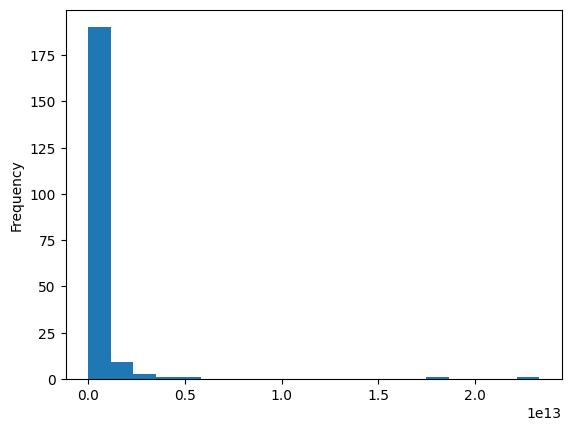

In [ ]:
# GDP spread
df_allvari["2021 GDP (current US$)"].plot.hist(bins=20)

# maybe take a logarithm of the GDP to account for outliers
# maybe bucket depending on the question we want to explore

In [ ]:
# Looks like we'll want to check on those outliers to the far right

df_allvari[df_allvari["2021 GDP (current US$)"] > 1.5e13]

country_name country_code  2021 GDP (current US$)  \
35           China          CHN            1.782050e+13   
200  United States          USA            2.331510e+13   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
35                      62.512                    0.678       24.4   CHN   
200                     82.873                    0.748       14.8   USA   

     composition_food_organic_waste_percent  composition_glass_percent  \
35                                     61.2                        2.1   
200                                    14.9                        4.4   

     composition_metal_percent  composition_other_percent  \
35                         1.1                       13.1   
200                        9.0                        3.2   

     composition_paper_cardboard_percent  composition_plastic_percent  \
35                                   9.6                          9.8   
200                                 26.6                         12.9   

     population_population_number_of_people  \
35                             1.400050e+09   
200                            3.266875e+08   

     total_msw_total_msw_generated_tons_year _merge  
35                               395081376.0   both  
200                              265224528.0   both

In [ ]:
# Great -- these outliers look like what we might expect

<Axes: ylabel='Frequency'>

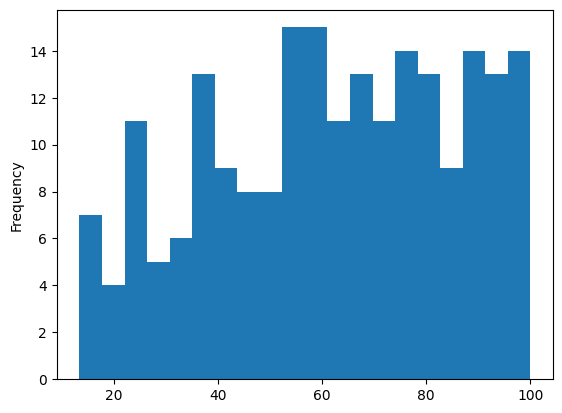

In [ ]:
# Urban % spread
df_allvari["% Urban Population (2021)"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

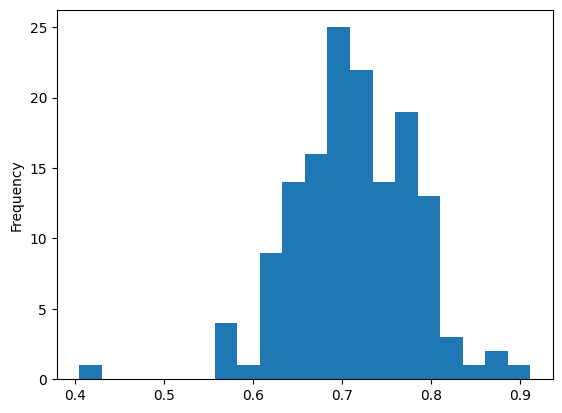

In [ ]:
# Gender score spread
df_allvari["2023 Gender Score (0-1)"].plot.hist(bins=20)

In [ ]:
# Let's take a closer look at the outlier on the left side

df_allvari[df_allvari["2023 Gender Score (0-1)"] < 0.5]

country_name country_code  2021 GDP (current US$)  \
1  Afghanistan          AFG            1.426650e+10   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
1                     26.314                    0.405       11.1   AFG   

   composition_food_organic_waste_percent  composition_glass_percent  \
1                                     NaN                        NaN   

   composition_metal_percent  composition_other_percent  \
1                        NaN                        NaN   

   composition_paper_cardboard_percent  composition_plastic_percent  \
1                                  NaN                          NaN   

   population_population_number_of_people  \
1                              34656032.0   

   total_msw_total_msw_generated_tons_year _merge  
1                               5628525.37   both

In [ ]:
# This outlier seems plausible

<Axes: ylabel='Frequency'>

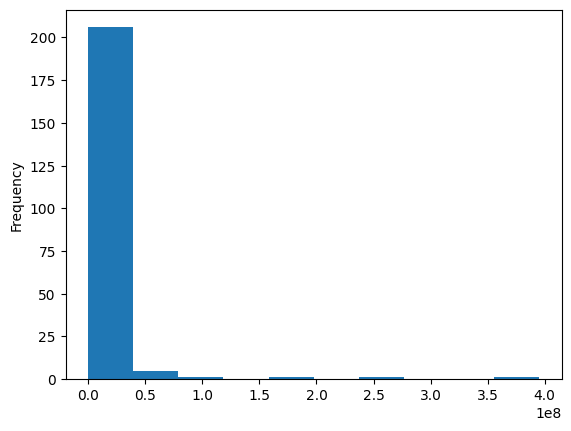

In [ ]:
# Let's also visualize our waste data

df_allvari["total_msw_total_msw_generated_tons_year"].plot.hist(bins = 10)

In [ ]:
# Again, let's investigate our outliers

df_allvari[df_allvari["total_msw_total_msw_generated_tons_year"] > 1.5e8]

country_name country_code  2021 GDP (current US$)  \
35           China          CHN            1.782050e+13   
87           India          IND            3.150310e+12   
200  United States          USA            2.331510e+13   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
35                      62.512                    0.678       24.4   CHN   
87                      35.393                    0.643       17.8   IND   
200                     82.873                    0.748       14.8   USA   

     composition_food_organic_waste_percent  composition_glass_percent  \
35                                     61.2                        2.1   
87                                      NaN                        NaN   
200                                    14.9                        4.4   

     composition_metal_percent  composition_other_percent  \
35                         1.1                       13.1   
87                         NaN                        NaN   
200                        9.0                        3.2   

     composition_paper_cardboard_percent  composition_plastic_percent  \
35                                   9.6                          9.8   
87                                   NaN                          NaN   
200                                 26.6                         12.9   

     population_population_number_of_people  \
35                             1.400050e+09   
87                             1.352617e+09   
200                            3.266875e+08   

     total_msw_total_msw_generated_tons_year _merge  
35                               395081376.0   both  
87                               189750000.0   both  
200                              265224528.0   both

In [ ]:
# these outliers seem to be plausible

<Axes: ylabel='Frequency'>

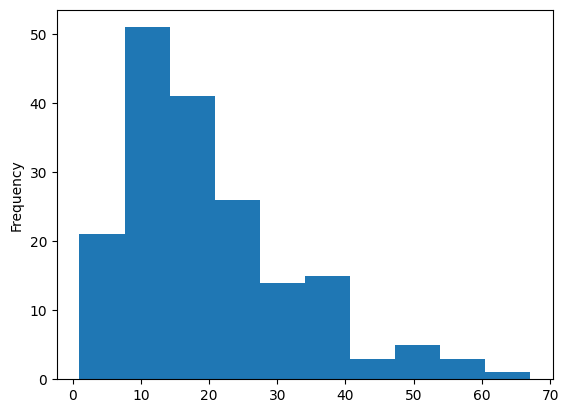

In [ ]:
# Finally, let's look at our recycling rate data

df_allvari["EPI Score"].plot.hist(bins = 10)


# Cleaning Combined Data

In [ ]:
# Before we start analyzing our data, let's clean up our data a bit
# We will likely want to first normalize some of our data by the population of each country
  # For example, let's look at per capita waste generation and per capita GDP
# We will also want to create some buckets for our data

In [ ]:
# Let's start by looking at our data again

df_allvari.head(5)

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
2                     67.460                    0.656       19.0   AGO   
3                     62.969                    0.791       20.5   ALB   
4                     87.858                      NaN        NaN   AND   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 11.9                         13.5   
3                                  9.9                          9.6   
4                                 35.1                         11.3   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
2                              25096150.0   
3                               2854191.0   
4                                 82431.0   

   total_msw_total_msw_generated_tons_year _merge  
0                             8.813202e+04   both  
1                             5.628525e+06   both  
2                             4.213644e+06   both  
3                             1.087447e+06   both  
4                             4.300000e+04   both

In [ ]:
# Let's create a new column for Per Capita Waste Generation
# We'll use the total annual waste generation and the population to calculate this

In [ ]:
df_allvari["Waste Generation Per Capita"] = (df_allvari["total_msw_total_msw_generated_tons_year"] / df_allvari["population_population_number_of_people"])

In [ ]:
# now let's check that that worked
df_allvari.head(5)

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
2                     67.460                    0.656       19.0   AGO   
3                     62.969                    0.791       20.5   ALB   
4                     87.858                      NaN        NaN   AND   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 11.9                         13.5   
3                                  9.9                          9.6   
4                                 35.1                         11.3   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
2                              25096150.0   
3                               2854191.0   
4                                 82431.0   

   total_msw_total_msw_generated_tons_year _merge  Waste Generation Per Capita  
0                             8.813202e+04   both                     0.854100  
1                             5.628525e+06   both                     0.162411  
2                             4.213644e+06   both                     0.167900  
3                             1.087447e+06   both                     0.381000  
4                             4.300000e+04   both                     0.521648

In [ ]:
# Let's create another column for Per Capita GDP using the same method

In [ ]:
df_allvari["GDP Per Capita"] = (df_allvari["2021 GDP (current US$)"] / df_allvari["population_population_number_of_people"])

In [ ]:
# now let's check that that worked
df_allvari.head(5)

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
2                     67.460                    0.656       19.0   AGO   
3                     62.969                    0.791       20.5   ALB   
4                     87.858                      NaN        NaN   AND   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  composition_other_percent  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        4.4                      11.50   
3                        4.8                      15.21   
4                        2.6                      11.60   

   composition_paper_cardboard_percent  composition_plastic_percent  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 11.9                         13.5   
3                                  9.9                          9.6   
4                                 35.1                         11.3   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
2                              25096150.0   
3                               2854191.0   
4                                 82431.0   

   total_msw_total_msw_generated_tons_year _merge  \
0                             8.813202e+04   both   
1                             5.628525e+06   both   
2                             4.213644e+06   both   
3                             1.087447e+06   both   
4                             4.300000e+04   both   

   Waste Generation Per Capita  GDP Per Capita  
0                     0.854100    30073.401708  
1                     0.162411      411.659922  
2                     0.167900     2650.013249  
3                     0.381000     6282.188234  
4                     0.521648    40338.509699

In [ ]:
# We should visualize the spread of these two new per capita variables

<Axes: ylabel='Frequency'>

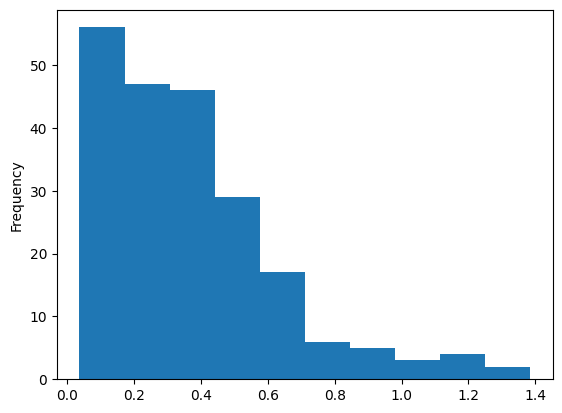

In [ ]:
# Waste Generation per capita:
df_allvari["Waste Generation Per Capita"].plot.hist(bins=10)

In [ ]:
# Interesting trend with no major outliers
# Let's still see which ones are in that long tail on the right

df_allvari[df_allvari["Waste Generation Per Capita"] > 0.9]

country_name country_code  2021 GDP (current US$)  \
24                  Bermuda          BMU            7.127200e+09   
46           Cayman Islands          CYM            6.028374e+09   
118                  Monaco          MCO            8.626081e+09   
119                 Moldova          MDA            1.369223e+10   
129                Mongolia          MNG            1.528644e+10   
154             Puerto Rico          PRI            1.063690e+11   
204  British Virgin Islands          VGB                     NaN   
205   Virgin Islands (U.S.)          VIR            4.444000e+09   
215           Faroe Islands          FRO            3.655064e+09   
217                     NaN          NaN                     NaN   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
24                     100.000                      NaN        NaN   BMU   
46                     100.000                      NaN        NaN   CYM   
118                    100.000                      NaN        NaN   MCO   
119                     42.998                    0.788       36.9   MDA   
129                     68.785                    0.704       13.0   MNG   
154                     93.592                      NaN        NaN   PRI   
204                     48.920                      NaN        NaN   VGB   
205                     96.040                      NaN        NaN   VIR   
215                        NaN                      NaN        NaN   FRO   
217                        NaN                      NaN        NaN   CHI   

     composition_food_organic_waste_percent  composition_glass_percent  \
24                                     17.0                        9.0   
46                                     10.9                        3.5   
118                                     NaN                        3.0   
119                                    55.0                        4.0   
129                                    22.7                        NaN   
154                                    13.1                        2.4   
204                                     6.5                       18.1   
205                                    46.0                        7.0   
215                                     NaN                        NaN   
217                                     NaN                        NaN   

     composition_metal_percent  composition_other_percent  \
24                         6.0                       26.0   
46                         6.2                       11.4   
118                        2.2                        NaN   
119                        3.0                       23.0   
129                        NaN                       50.1   
154                       10.4                       23.8   
204                        8.6                        4.8   
205                        7.0                       12.0   
215                        NaN                        NaN   
217                        NaN                        NaN   

     composition_paper_cardboard_percent  composition_plastic_percent  \
24                                  29.0                         13.0   
46                                  31.1                         11.0   
118                                  2.2                          1.0   
119                                  5.0                         10.0   
129                                 12.7                         14.5   
154                                 19.4                         10.4   
204                                 33.5                          6.3   
205                                 15.0                         13.0   
215                                  NaN                          NaN   
217                                  NaN                          NaN   

     population_population_number_of_people  \
24                                  64798.0   
46                                  59172.0 

<Axes: ylabel='Frequency'>

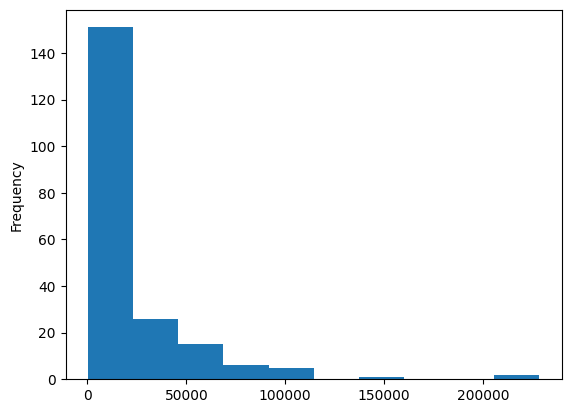

In [ ]:
# Now let's look at our other per capita variable
# GDP per capita:
df_allvari["GDP Per Capita"].plot.hist(bins=10)

In [ ]:
# again, let's look at our outliers

df_allvari[df_allvari["GDP Per Capita"] > 130000]

country_name country_code  2021 GDP (current US$)  \
110  Liechtenstein          LIE            7.710380e+09   
114     Luxembourg          LUX            8.558411e+10   
118         Monaco          MCO            8.626081e+09   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
110                     14.471                      NaN        NaN   LIE   
114                     91.672                    0.747       42.0   LUX   
118                    100.000                      NaN        NaN   MCO   

     composition_food_organic_waste_percent  composition_glass_percent  \
110                                    37.6                        5.0   
114                                    30.0                        4.0   
118                                     NaN                        3.0   

     composition_metal_percent  composition_other_percent  \
110                       12.5                        9.1   
114                        2.0                       27.0   
118                        2.2                        NaN   

     composition_paper_cardboard_percent  composition_plastic_percent  \
110                                 30.3                          5.4   
114                                 19.0                         18.0   
118                                  2.2                          1.0   

     population_population_number_of_people  \
110                                 36545.0   
114                                619896.0   
118                                 37783.0   

     total_msw_total_msw_generated_tons_year _merge  \
110                                 32382.00   both   
114                                490337.75   both   
118                                 46000.00   both   

     Waste Generation Per Capita  GDP Per Capita  
110                     0.886086   210983.173786  
114                     0.791000   138062.039429  
118                     1.217479   228305.886801

In [ ]:
# these seem plausible as our outliers

In [ ]:
# Now let's look a little more at our dataframe

In [ ]:
df_allvari.describe()

2021 GDP (current US$)  % Urban Population (2021)  \
count            2.060000e+02                 213.000000   
mean             4.652977e+11                  61.959404   
std              2.122556e+12                  23.780238   
min              6.019641e+07                  13.456000   
25%              7.272995e+09                  43.358000   
50%              2.842998e+10                  63.222000   
75%              2.057105e+11                  81.425000   
max              2.331510e+13                 100.000000   

       2023 Gender Score (0-1)   EPI Score  \
count               145.000000  180.000000   
mean                  0.712152   19.942778   
std                   0.067894   12.612812   
min                   0.405000    1.000000   
25%                   0.676000   11.500000   
50%                   0.711000   15.550000   
75%                   0.761000   24.825000   
max                   0.912000   67.100000   

       composition_food_organic_waste_percent  composition_glass_percent  \
count                              176.000000                 171.000000   
mean                                41.734392                   4.756173   
std                                 17.898231                   3.399614   
min                                  3.100000                   0.000000   
25%                                 29.225000                   2.805000   
50%                                 43.200000                   4.000000   
75%                                 54.550000                   5.900000   
max                                 87.600000                  21.400000   

       composition_metal_percent  composition_other_percent  \
count                 170.000000                 175.000000   
mean                    4.276838                  18.418010   
std                     3.522976                  16.015182   
min                     0.100000                   0.800000   
25%                     2.000000                   9.000000   
50%                     3.000000                  14.000000   
75%                     5.000000                  22.351351   
max                    19.380000                  92.700000   

       composition_paper_cardboard_percent  composition_plastic_percent  \
count                           176.000000                   175.000000   
mean                             15.277361                    11.687394   
std                               9.478098                     5.585085   
min                               2.000000                     1.000000   
25%                               8.625000                     7.950000   
50%                              13.155000                    11.500000   
75%                              20.000000                    14.555000   
max                              58.700000                    32.000000   

       population_population_number_of_people  \
count                            2.170000e+02   
mean                             3.364389e+07   
std                              1.365838e+08   
min                              1.109700e+04   
25%                              7.462210e+05   
50%                              5.737723e+06   
75%                              2.120300e+07   
max                              1.400050e+09   

       total_msw_total_msw_generated_tons_year  Waste Generation Per Capita  \
count                             2.150000e+02                   215.000000   
mean                              9.638990e+06                     0.376462   
std                               3.600216e+07                     0.259919   
min                               3.989486e+03                     0.037370   
25%                               2.138795e+05                     0.169594   
50%                               1.787400e+06                     0.319375   
75%                               5.282711e+06                     0.504119   
max                               3.950814e+08  

In [ ]:
# We will want to create some bins for our data so that they can be compared as categories

# Variables we will create bins for:
  # GDP
  # GDP per capita
  # % Urban Population
  # Gender Score

In [ ]:
# first, let's create buckets for GDP
# We'll do 5 buckets: low, medium-low, medium, medium-high, and high

In [ ]:
df_allvari["GDP_bins"] = pd.qcut(df_allvari['2021 GDP (current US$)'], q = 5, labels = ["low", "medium-low", "medium", "medium-high", "high"])

In [ ]:
df_allvari.sample(n=10)

country_name country_code  2021 GDP (current US$)  \
56         Egypt, Arab Rep.          EGY            4.246720e+11   
124         North Macedonia          MKD            1.399836e+10   
117                 Morocco          MAR            1.418180e+11   
163                  Rwanda          RWA            1.105452e+10   
24                  Bermuda          BMU            7.127200e+09   
180                Eswatini          SWZ            4.850843e+09   
74                   Greece          GRC            2.146680e+11   
204  British Virgin Islands          VGB                     NaN   
84                  Hungary          HUN            1.820900e+11   
196                Tanzania          TZA            7.065563e+10   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
56                      42.862                    0.626       26.6   EGY   
124                     58.786                    0.711        4.9   MKD   
117                     64.065                    0.621       25.4   MAR   
163                     17.568                    0.794       11.5   RWA   
24                     100.000                      NaN        NaN   BMU   
180                     24.369                    0.745       17.3   SWZ   
74                      80.038                    0.693       22.4   GRC   
204                     48.920                      NaN        NaN   VGB   
84                      72.245                    0.689       31.0   HUN   
196                     35.954                    0.740       12.3   TZA   

     composition_food_organic_waste_percent  composition_glass_percent  \
56                                     56.0                        4.0   
124                                    29.3                        4.1   
117                                    60.0                        2.0   
163                                     NaN                        NaN   
24                                     17.0                        9.0   
180                                     NaN                        NaN   
74                                     40.0                        3.0   
204                                     6.5                       18.1   
84                                     22.5                        3.5   
196                                     NaN                        NaN   

     composition_metal_percent  composition_other_percent  \
56                         2.0                       15.0   
124                        2.5                       19.8   
117                        2.5                        6.0   
163                        NaN                        NaN   
24                         6.0                       26.0   
180                        NaN                        NaN   
74                         3.0                        9.0   
204                        8.6                        4.8   
84                         1.8                       45.9   
196                        NaN                        NaN   

     composition_paper_cardboard_percent  composition_plastic_percent  \
56                                  10.0                         13.0   
124                                 12.8                         13.9   
117                                  9.0                          8.0   
163                                  NaN                          NaN   
24                                  29.0                         13.0   
180                                  NaN                          NaN   
74                                  29.0                         14.0   
204                                 33.5                          6.3   
84                                  13.4                         13.0   
196                                  NaN                          NaN   

     population_population_number_of_people  \
56                               87813256.0   
124                               2082958.0 

In [ ]:
# Let's create bins for GDP per capita now
# We'll do 3 buckets: high, medium, low

In [ ]:
df_allvari["GDP per capita_bins"] = pd.qcut(df_allvari['GDP Per Capita'], q = 3, labels = ["low", "medium", "high"])

In [ ]:
df_allvari.sample(n=10)

country_name country_code  2021 GDP (current US$)  \
36   Cote d'Ivoire          CIV            7.181108e+10   
125           Mali          MLI            1.930946e+10   
30        Botswana          BWA            1.873707e+10   
113      Lithuania          LTU            6.679893e+10   
211         Zambia          ZMB            2.209642e+10   
137  New Caledonia          NCL            1.007135e+10   
2           Angola          AGO            6.650513e+10   
160          Qatar          QAT            1.797320e+11   
24         Bermuda          BMU            7.127200e+09   
42      Cabo Verde          CPV            1.997866e+09   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
36                      52.180                    0.650       13.3   CIV   
125                     44.677                    0.605       10.4   MLI   
30                      71.560                    0.719       21.0   BWA   
113                     68.249                    0.800       34.9   LTU   
211                     45.192                    0.699       12.6   ZMB   
137                     71.925                      NaN        NaN   NCL   
2                       67.460                    0.656       19.0   AGO   
160                     99.278                    0.627        6.0   QAT   
24                     100.000                      NaN        NaN   BMU   
42                      67.102                    0.761       17.4   CPV   

     composition_food_organic_waste_percent  composition_glass_percent  \
36                                      NaN                        NaN   
125                                    17.5                       1.00   
30                                      8.1                        NaN   
113                                    40.4                       8.65   
211                                     NaN                        NaN   
137                                    43.6                       5.50   
2                                      51.8                       6.70   
160                                    57.0                       4.00   
24                                     17.0                       9.00   
42                                      NaN                        NaN   

     composition_metal_percent  composition_other_percent  \
36                         NaN                        NaN   
125                       3.50                      72.50   
30                        0.10                      91.90   
113                       2.75                      44.05   
211                        NaN                        NaN   
137                      10.00                       9.30   
2                         4.40                      11.50   
160                       9.00                       5.00   
24                        6.00                      26.00   
42                         NaN                        NaN   

     composition_paper_cardboard_percent  composition_plastic_percent  \
36                                   NaN                          NaN   
125                                 3.50                         2.00   
30                                   NaN                          NaN   
113                                10.05                        10.15   
211                                  NaN                          NaN   
137                                10.90                        16.50   
2                                  11.90                        13.50   
160                                11.00                        14.00   
24                                 29.00                        13.00   
42                                   NaN                          NaN   

     population_population_number_of_people  \
36                               20401332.0   
125                              16006670.0   
30                                2014866.0   
113                               278684

In [ ]:
# now, let's create buckets for % urban
# We'll do 3 buckets: high, medium, low

In [ ]:
df_allvari["urban_bins"] = pd.qcut(df_allvari["% Urban Population (2021)"], q = 3, labels = ["low", "medium", "high"])

In [ ]:
df_allvari.sample(n=10)

country_name country_code  2021 GDP (current US$)  \
138         Niger          NER            1.491500e+10   
74         Greece          GRC            2.146680e+11   
169  Sierra Leone          SLE            4.249235e+09   
201    Uzbekistan          UZB            6.960061e+10   
78           Guam          GUM            6.123000e+09   
6       Argentina          ARG            4.879030e+11   
58          Spain          ESP            1.445650e+12   
211        Zambia          ZMB            2.209642e+10   
139       Nigeria          NGA            4.408390e+11   
122        Mexico          MEX            1.312560e+12   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
138                     16.751                    0.622       20.3   NER   
74                      80.038                    0.693       22.4   GRC   
169                     43.372                    0.667        9.7   SLE   
201                     50.427                      NaN       31.6   UZB   
78                      95.015                      NaN        NaN   GUM   
6                       92.229                    0.762        9.6   ARG   
58                      81.056                    0.791       27.7   ESP   
211                     45.192                    0.699       12.6   ZMB   
139                     52.746                    0.637        4.7   NGA   
122                     81.016                    0.765        9.6   MEX   

     composition_food_organic_waste_percent  composition_glass_percent  \
138                                   38.00                        NaN   
74                                    40.00                       3.00   
169                                     NaN                        NaN   
201                                   40.00                       3.00   
78                                    27.30                       4.60   
6                                     38.74                       3.16   
58                                    49.00                       8.00   
211                                     NaN                        NaN   
139                                     NaN                       3.10   
122                                   52.40                       5.90   

     composition_metal_percent  ...  composition_paper_cardboard_percent  \
138                       1.00  ...                                 2.00   
74                        3.00  ...                                29.00   
169                        NaN  ...                                  NaN   
201                       2.00  ...                                17.50   
78                        9.00  ...                                28.50   
6                         1.84  ...                                13.96   
58                        3.00  ...                                15.00   
211                        NaN  ...                                  NaN   
139                        NaN  ...                                 8.00   
122                       3.40  ...                                13.80   

     composition_plastic_percent  population_population_number_of_people  \
138                         2.00                               8842415.0   
74                         14.00                              10716322.0   
169                          NaN                               5439695.0   
201                         2.50                              29774500.0   
78                         12.40                                159973.0   
6                          14.61                              42981516.0   
58                          9.00                              47076780.0   
211                          NaN                              14264756.0   
139                         4.80                             154402176.0   
122                        10.90                             125890952.0   

     total_msw_total_msw_generated_tons_

In [ ]:
# Now, we'll create buckets for gender
# We'll do 3 buckets: high, medium, low

df_allvari["gender_bins"] = pd.qcut(df_allvari["2023 Gender Score (0-1)"], q = 3, labels = ["low", "medium", "high"])

In [ ]:
df_allvari.sample(n=10)

country_name country_code  2021 GDP (current US$)  \
163                Rwanda          RWA            1.105452e+10   
182            Seychelles          SYC            1.286687e+09   
28      Brunei Darussalam          BRN            1.400650e+10   
80   Hong Kong SAR, China          HKG            3.689110e+11   
23                 Belize          BLZ            2.424575e+09   
82                Croatia          HRV            6.908124e+10   
203         Venezuela, RB          VEN                     NaN   
46         Cayman Islands          CYM            6.028374e+09   
156              Portugal          PRT            2.555350e+11   
36          Cote d'Ivoire          CIV            7.181108e+10   

     % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
163                     17.568                    0.794       11.5   RWA   
182                     57.972                      NaN       24.4   SYC   
28                      78.554                    0.693       20.0   BRN   
80                     100.000                      NaN        NaN   HKG   
23                      46.201                    0.696       10.4   BLZ   
82                      57.878                    0.730       20.0   HRV   
203                     88.325                      NaN       21.3   VEN   
46                     100.000                      NaN        NaN   CYM   
156                     66.849                    0.765       23.5   PRT   
36                      52.180                    0.650       13.3   CIV   

     composition_food_organic_waste_percent  composition_glass_percent  \
163                                     NaN                        NaN   
182                                   48.50                       5.20   
28                                    36.00                       3.00   
80                                    35.00                       3.00   
23                                    47.00                       8.00   
82                                    30.90                       3.70   
203                                     NaN                        NaN   
46                                    10.90                       3.50   
156                                   36.49                       6.73   
36                                      NaN                        NaN   

     composition_metal_percent  ...  composition_plastic_percent  \
163                        NaN  ...                          NaN   
182                       4.60  ...                         9.90   
28                        4.00  ...                        16.00   
80                        2.00  ...                        21.00   
23                        5.00  ...                        19.00   
82                        2.10  ...                        22.90   
203                        NaN  ...                          NaN   
46                        6.20  ...                        11.00   
156                       1.85  ...                        10.72   
36                         NaN  ...                          NaN   

     population_population_number_of_people  \
163                              11917508.0   
182                                 88303.0   
28                                 423196.0   
80                                7305700.0   
23                                 359288.0   
82                                4067500.0   
203                              29893080.0   
46                                  59172.0   
156                              10269417.0   
36                               20401332.0   

     total_msw_total_msw_generated_tons_year  _merge  \
163                             4.384969e+06    both   
182                             4.800000e+04    both   
28                              2.162532e+05    both   
80                              5.679816e+06    both   
23                              1.013788e+05    both   
82                             

# Relationships between data

In [ ]:
# Let's explore the relationships between some of our variables
# Note that we are just looking at high level trends
# We will test the statistical significance of these relationships later

In [ ]:
# First let's look at relationships between non-population normalized variables:

In [ ]:
df_allvari.head()

country_name country_code  2021 GDP (current US$)  \
0        Aruba          ABW            3.103184e+09   
1  Afghanistan          AFG            1.426650e+10   
2       Angola          AGO            6.650513e+10   
3      Albania          ALB            1.793057e+10   
4      Andorra          AND            3.325144e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
2                     67.460                    0.656       19.0   AGO   
3                     62.969                    0.791       20.5   ALB   
4                     87.858                      NaN        NaN   AND   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                    51.8                        6.7   
3                                    51.4                        4.5   
4                                    31.2                        8.2   

   composition_metal_percent  ...  composition_plastic_percent  \
0                        NaN  ...                          NaN   
1                        NaN  ...                          NaN   
2                        4.4  ...                         13.5   
3                        4.8  ...                          9.6   
4                        2.6  ...                         11.3   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
2                              25096150.0   
3                               2854191.0   
4                                 82431.0   

   total_msw_total_msw_generated_tons_year  _merge  \
0                             8.813202e+04    both   
1                             5.628525e+06    both   
2                             4.213644e+06    both   
3                             1.087447e+06    both   
4                             4.300000e+04    both   

   Waste Generation Per Capita GDP Per Capita     GDP_bins  \
0                     0.854100   30073.401708          low   
1                     0.162411     411.659922   medium-low   
2                     0.167900    2650.013249  medium-high   
3                     0.381000    6282.188234       medium   
4                     0.521648   40338.509699          low   

   GDP per capita_bins urban_bins gender_bins  
0                 high        low         NaN  
1                  low        low         low  
2                  low     medium         low  
3               medium     medium        high  
4                 high       high         NaN  

[5 rows x 22 columns]

In [ ]:
# Let's look at trends with GDP and Waste Generation
df_allvari.groupby("GDP_bins").agg(avg = ("total_msw_total_msw_generated_tons_year", "mean"))

avg
GDP_bins                 
low          1.598776e+05
medium-low   1.158120e+06
medium       1.914005e+06
medium-high  5.512612e+06
high         4.111368e+07

In [ ]:
# Looks like there could be a relationship here
# Medium-high and high GDP countries look like they generate more waste on average

In [ ]:
# Let's look at trends with % Urban and Waste Generation
df_allvari.groupby("urban_bins").agg(avg = ("total_msw_total_msw_generated_tons_year", "mean"))

avg
urban_bins              
low         6.124266e+06
medium      1.086550e+07
high        1.259513e+07

In [ ]:
# Looks like there could be a relationship here
# Medium and high urban countries look like they generate more waste on average

In [ ]:
# Now let's look at trends with Gender Score and Waste Generation
df_allvari.groupby("gender_bins").agg(avg = ("total_msw_total_msw_generated_tons_year", "mean"))

avg
gender_bins              
low          1.856493e+07
medium       7.271372e+06
high         1.394979e+07

In [ ]:
# this trend looks interesting
# It looks like medium-gender score countries have lower waste generation on average

In [ ]:
# Now let's look at trends with recycling rate data (EPI Score) with these 3 independent variables

In [ ]:
df_allvari.groupby("GDP_bins").agg(avg = ("EPI Score", "mean"))

avg
GDP_bins              
low          16.560714
medium-low   15.266667
medium       18.881579
medium-high  18.025000
high         29.047500

In [ ]:
# It looks like high GDP countries have higher recycling rates

In [ ]:
df_allvari.groupby("urban_bins").agg(avg = ("EPI Score", "mean"))

avg
urban_bins           
low         17.526563
medium      18.732308
high        24.732000

In [ ]:
# It looks like high urban countries have higher recycling rates

In [ ]:
df_allvari.groupby("gender_bins").agg(avg = ("EPI Score", "mean"))

avg
gender_bins           
low          17.981633
medium       18.375000
high         25.020833

In [ ]:
# It looks like high-gender score countries have higher recycling rates

In [ ]:
# Finally, let's look at the % of organic waste in total waste and how it relates to our independent variables

In [ ]:
df_allvari.groupby("GDP_bins").agg(avg = ("composition_food_organic_waste_percent", "mean"))

avg
GDP_bins              
low          40.852667
medium-low   40.315714
medium       44.099340
medium-high  45.247223
high         38.360299

In [ ]:
# It looks like high GDP countries have less food waste % on average
# It's interesting because medium-high GDP countries have the highest food waste % on average

In [ ]:
df_allvari.groupby("urban_bins").agg(avg = ("composition_food_organic_waste_percent", "mean"))

avg
urban_bins           
low         47.047847
medium      43.235230
high        36.722576

In [ ]:
# It looks like high urban countries have less food waste % on average

In [ ]:
df_allvari.groupby("gender_bins").agg(avg = ("composition_food_organic_waste_percent", "mean"))

avg
gender_bins           
low          47.521612
medium       46.811355
high         36.742041

In [ ]:
# It looks like high gender score countries have lower food waste % on average

In [ ]:
# Now let's visualize our data correlations a bit more with scatterplots

<Axes: xlabel='2021 GDP (current US$)', ylabel='total_msw_total_msw_generated_tons_year'>

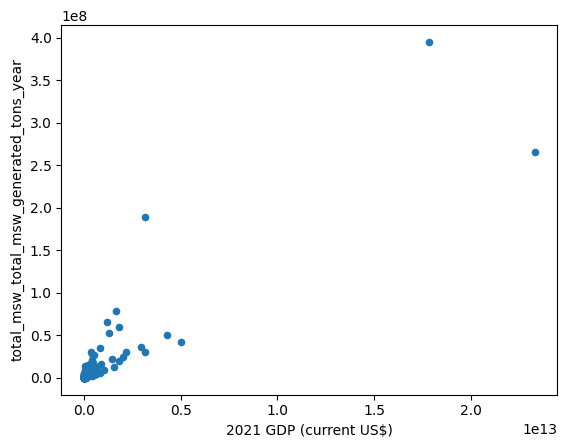

In [ ]:
# GDP
df_allvari.plot.scatter(x = "2021 GDP (current US$)", y = "total_msw_total_msw_generated_tons_year")

<Axes: xlabel='% Urban Population (2021)', ylabel='total_msw_total_msw_generated_tons_year'>

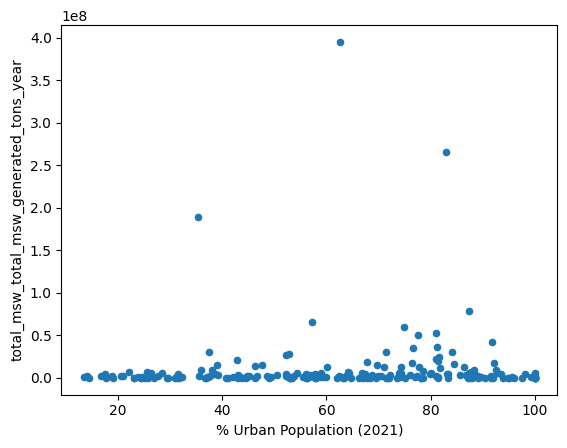

In [ ]:
# Urban %
df_allvari.plot.scatter(x = "% Urban Population (2021)", y = "total_msw_total_msw_generated_tons_year")

<Axes: xlabel='2023 Gender Score (0-1)', ylabel='total_msw_total_msw_generated_tons_year'>

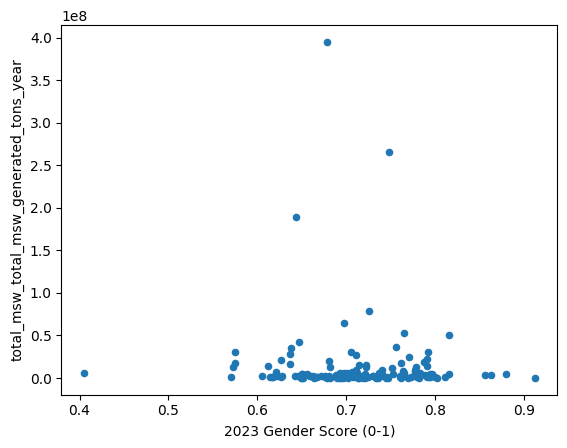

In [ ]:
# Gender Score
df_allvari.plot.scatter(x = "2023 Gender Score (0-1)", y = "total_msw_total_msw_generated_tons_year")

<Axes: xlabel='2021 GDP (current US$)', ylabel='EPI Score'>

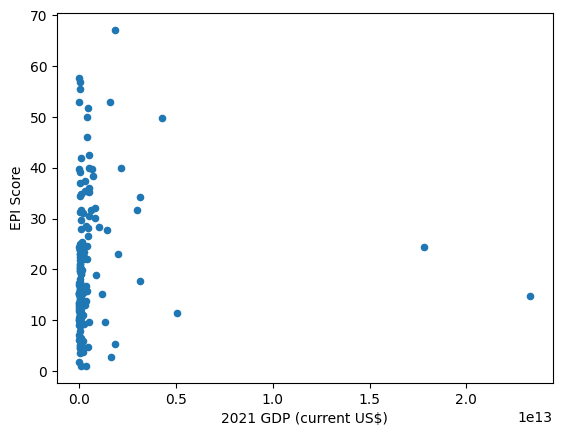

In [ ]:
# GDP
df_allvari.plot.scatter(x = "2021 GDP (current US$)", y = "EPI Score")

<Axes: xlabel='% Urban Population (2021)', ylabel='EPI Score'>

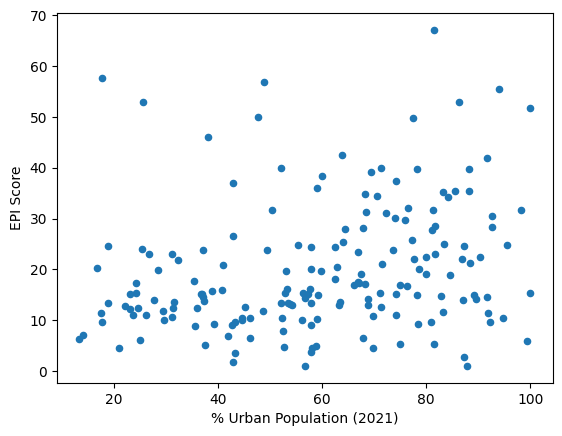

In [ ]:
# Urban %
df_allvari.plot.scatter(x = "% Urban Population (2021)", y = "EPI Score")

<Axes: xlabel='2023 Gender Score (0-1)', ylabel='EPI Score'>

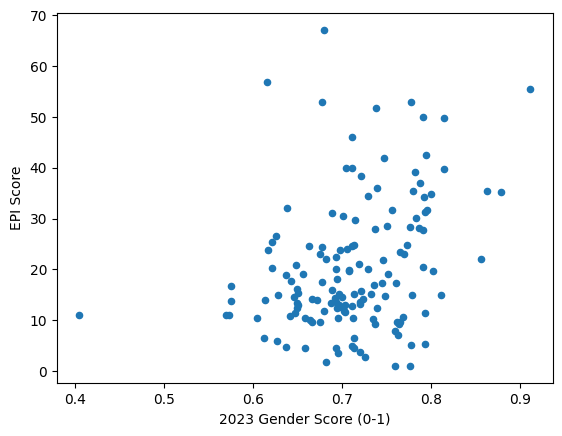

In [ ]:
# Gender Score
df_allvari.plot.scatter(x = "2023 Gender Score (0-1)", y = "EPI Score")

In [ ]:
# Most of these scatterplots look like there aren't clear relationships between our variables

In [ ]:
# Now let's explore some relationships between variables that have been normalized by population size

In [ ]:
# Let's look at: GDP per capita and waste generation per capita

In [ ]:
df_allvari.groupby("GDP per capita_bins").agg(avg = ("Waste Generation Per Capita", "mean"))

avg
GDP per capita_bins          
low                  0.181607
medium               0.321406
high                 0.615687

In [ ]:
# Looks like higher GDP per capita countries tend to have higher waste generation per capita

<Axes: xlabel='GDP Per Capita', ylabel='Waste Generation Per Capita'>

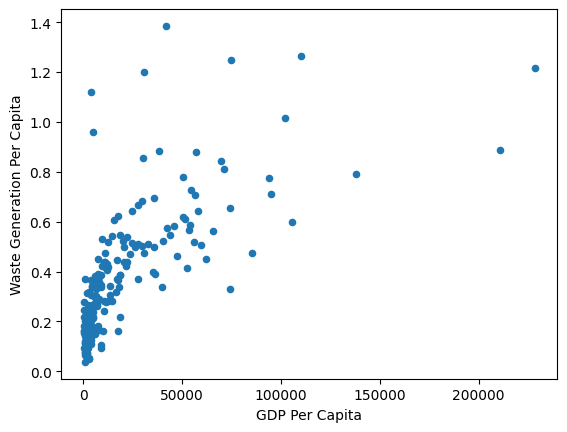

In [ ]:
# Let's take a look at the scatter plot

df_allvari.plot.scatter(x = "GDP Per Capita", y = "Waste Generation Per Capita")

In [ ]:
# Interesting!

In [ ]:
# Now let's look at Urban % and waste generation per capita

In [ ]:
df_allvari.groupby("urban_bins").agg(avg = ("Waste Generation Per Capita", "mean"))

avg
urban_bins          
low         0.238431
medium      0.334652
high        0.539982

In [ ]:
# Looks like higher urban countries tend to have higher waste generation per capita

<Axes: xlabel='% Urban Population (2021)', ylabel='Waste Generation Per Capita'>

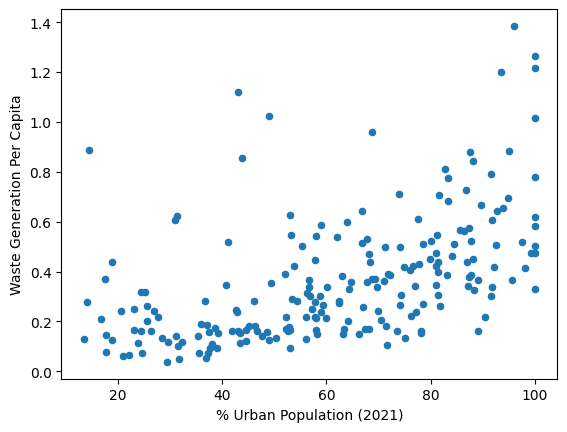

In [ ]:
# Let's take a look at the scatter plot

df_allvari.plot.scatter(x = "% Urban Population (2021)", y = "Waste Generation Per Capita")

In [ ]:
# We're seeing more of a trend than when we looked at non-normalized variables

In [ ]:
# Finally let's look at gender score and waste generation per capita

In [ ]:
df_allvari.groupby("gender_bins").agg(avg = ("Waste Generation Per Capita", "mean"))

avg
gender_bins          
low          0.259250
medium       0.300942
high         0.458189

In [ ]:
# again, it looks like countries with higher gender scores tend to have higher waste generation per capita

<Axes: xlabel='2023 Gender Score (0-1)', ylabel='Waste Generation Per Capita'>

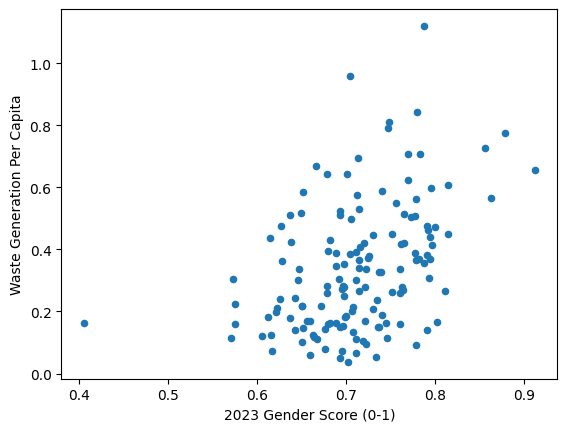

In [ ]:
# Let's take a look at the scatter plot

df_allvari.plot.scatter(x = "2023 Gender Score (0-1)", y = "Waste Generation Per Capita")

In [ ]:
# Interesting -- again, it looks like the per capita values show more of a relationship!

In [ ]:
# LET'S SEE IF WE CAN ADD THIS
#heat map for correlation between different variables

**T-tests**

In [ ]:
# We now want to run some stats test to better understand the relationships between our variables

# An issue we found is that stats tests don't work if there are any null values
# Let's make a new dataframe where we drop all the null values of df_allvari

# Later we'll look for patterns in the countries that were dropped
  # For example, was there a bias in the countries that were dropped?

df_allvari_dropna = df_allvari.dropna()
df_allvari_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 2 to 212
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   country_name                             109 non-null    object  
 1   country_code                             109 non-null    object  
 2   2021 GDP (current US$)                   109 non-null    float64 
 3   % Urban Population (2021)                109 non-null    float64 
 4   2023 Gender Score (0-1)                  109 non-null    float64 
 5   EPI Score                                109 non-null    float64 
 6   iso3c                                    109 non-null    object  
 7   composition_food_organic_waste_percent   109 non-null    float64 
 8   composition_glass_percent                109 non-null    float64 
 9   composition_metal_percent                109 non-null    float64 
 10  composition_other_percent                10

In [ ]:
# Let's run some t-tests on this new dataset without null values

In [ ]:
# test between GDP and total msw generated

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["GDP_bins"] == "low"]["total_msw_total_msw_generated_tons_year"],
                df_allvari_dropna[df_allvari_dropna["GDP_bins"] == "high"]["total_msw_total_msw_generated_tons_year"])

# p value is much greater than 0.05, probably because they're drawn from different distribtions?

TtestResult(statistic=-1.2340737882334187, pvalue=0.2245604608731322, df=39.0)

In [ ]:
# between urban population and EPI

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["urban_bins"] == "high"]["EPI Score"],
                df_allvari_dropna[df_allvari_dropna["urban_bins"] == "low"]["EPI Score"])

# this one too

TtestResult(statistic=0.501670235859722, pvalue=0.6175440536561587, df=67.0)

In [ ]:
# between gender and EPI

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["gender_bins"] == "high"]["EPI Score"],
                df_allvari_dropna[df_allvari_dropna["gender_bins"] == "low"]["EPI Score"])

TtestResult(statistic=2.454592275812418, pvalue=0.016668913865099028, df=68.0)

In [ ]:
# test between GDP per capita and waste generation per capita

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["GDP per capita_bins"] == "low"]["Waste Generation Per Capita"],
                df_allvari_dropna[df_allvari_dropna["GDP per capita_bins"] == "high"]["Waste Generation Per Capita"])

# we have a very low p value here!
# there is a significant difference between per capita waste generation for high and low GDP per capita countries!

TtestResult(statistic=-9.836579247007567, pvalue=5.8981313906320496e-15, df=72.0)

In [ ]:
# test between urban population and waste generation per capita

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["urban_bins"] == "low"]["Waste Generation Per Capita"],
                df_allvari_dropna[df_allvari_dropna["urban_bins"] == "high"]["Waste Generation Per Capita"])

# we have a very low p value here!
# there is a significant difference between per capita waste generation for high and low urban countries!

TtestResult(statistic=-6.713255567273825, pvalue=4.921233843491818e-09, df=67.0)

In [ ]:
# test between gender score and waste generation per capita

stats.ttest_ind(df_allvari_dropna[df_allvari_dropna["gender_bins"] == "low"]["Waste Generation Per Capita"],
                df_allvari_dropna[df_allvari_dropna["gender_bins"] == "high"]["Waste Generation Per Capita"])

# we have a very low p value here!
# there is a significant difference between per capita waste generation for high and low gender score countries!

TtestResult(statistic=-5.111790449147553, pvalue=2.7923447347806423e-06, df=68.0)

In [ ]:
# Based on these t-tests, for the countries that weren't dropped because of null values,
  # our 3 independent variables seem to play significant roles in affecting per capita waste generation rates

# Testing for the dropped countries

In [ ]:
# Now let's investigate the countries that were dropped because of null values before the stats test

In [ ]:
df_allvari_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 2 to 212
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   country_name                             109 non-null    object  
 1   country_code                             109 non-null    object  
 2   2021 GDP (current US$)                   109 non-null    float64 
 3   % Urban Population (2021)                109 non-null    float64 
 4   2023 Gender Score (0-1)                  109 non-null    float64 
 5   EPI Score                                109 non-null    float64 
 6   iso3c                                    109 non-null    object  
 7   composition_food_organic_waste_percent   109 non-null    float64 
 8   composition_glass_percent                109 non-null    float64 
 9   composition_metal_percent                109 non-null    float64 
 10  composition_other_percent                10

In [ ]:
# checking for the countries that got dropped from the OG dataset

df_allvari_dropna['country_name'].unique()

array(['Angola', 'Albania', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Canada', 'Switzerland', 'Chile',
       'China', 'Cameroon', 'Colombia', 'Comoros', 'Costa Rica', 'Cyprus',
       'Germany', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Greece', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'Ireland',
       'Iran, Islamic Rep.', 'Israel', 'Italy', 'Jamaica', 'Jordan',
       'Japan', 'Kazakhstan', 'Kenya', 'Cambodia', 'Kuwait', 'Lao PDR',
       'Lebanon', 'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia',
       'Morocco', 'Moldova', 'Mexico', 'North Macedonia', 'Mali', 'Malta',
     

In [ ]:
df_allvari['country_name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 

In [ ]:
# Concatenate the two dataframes
allvari_concat = pd.concat([df_allvari, df_allvari_dropna])
allvari_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 212
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   country_name                             326 non-null    object  
 1   country_code                             326 non-null    object  
 2   2021 GDP (current US$)                   315 non-null    float64 
 3   % Urban Population (2021)                322 non-null    float64 
 4   2023 Gender Score (0-1)                  254 non-null    float64 
 5   EPI Score                                289 non-null    float64 
 6   iso3c                                    326 non-null    object  
 7   composition_food_organic_waste_percent   285 non-null    float64 
 8   composition_glass_percent                280 non-null    float64 
 9   composition_metal_percent                279 non-null    float64 
 10  composition_other_percent                28

In [ ]:
allvari_concat['country_name'].nunique()

217

In [ ]:
# Count the occurrences of each value in the column
value_counts = allvari_concat['country_name'].value_counts()

# Get the values that only appear once
unique_values = value_counts[value_counts == 1].index

# Filter the DataFrame to get rows with only those values
dropped_countries = allvari_concat[allvari_concat['country_name'].isin(unique_values)]

dropped_countries.head()

country_name country_code  2021 GDP (current US$)  \
0                Aruba          ABW            3.103184e+09   
1          Afghanistan          AFG            1.426650e+10   
4              Andorra          AND            3.325144e+09   
8       American Samoa          ASM            7.500000e+08   
9  Antigua and Barbuda          ATG            1.601367e+09   

   % Urban Population (2021)  2023 Gender Score (0-1)  EPI Score iso3c  \
0                     43.866                      NaN        NaN   ABW   
1                     26.314                    0.405       11.1   AFG   
4                     87.858                      NaN        NaN   AND   
8                     87.169                      NaN        NaN   ASM   
9                     24.380                      NaN       15.3   ATG   

   composition_food_organic_waste_percent  composition_glass_percent  \
0                                     NaN                        NaN   
1                                     NaN                        NaN   
4                                    31.2                        8.2   
8                                    19.7                        3.4   
9                                    46.0                        7.0   

   composition_metal_percent  ...  composition_plastic_percent  \
0                        NaN  ...                          NaN   
1                        NaN  ...                          NaN   
4                        2.6  ...                         11.3   
8                        7.9  ...                         12.8   
9                        7.0  ...                         13.0   

   population_population_number_of_people  \
0                                103187.0   
1                              34656032.0   
4                                 82431.0   
8                                 55599.0   
9                                 96777.0   

   total_msw_total_msw_generated_tons_year  _merge  \
0                             8.813202e+04    both   
1                             5.628525e+06    both   
4                             4.300000e+04    both   
8                             1.898949e+04    both   
9                             3.058500e+04    both   

   Waste Generation Per Capita GDP Per Capita    GDP_bins  \
0                     0.854100   30073.401708         low   
1                     0.162411     411.659922  medium-low   
4                     0.521648   40338.509699         low   
8                     0.341544   13489.451249         low   
9                     0.316036   16546.975697         low   

   GDP per capita_bins urban_bins gender_bins  
0                 high        low         NaN  
1                  low        low         low  
4                 high       high         NaN  
8               medium       high         NaN  
9               medium        low         NaN  

[5 rows x 22 columns]

In [ ]:
dropped_countries.info()

# 108 countries, that is indeed the number of countries dropped!

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 216
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   country_name                             108 non-null    object  
 1   country_code                             108 non-null    object  
 2   2021 GDP (current US$)                   97 non-null     float64 
 3   % Urban Population (2021)                104 non-null    float64 
 4   2023 Gender Score (0-1)                  36 non-null     float64 
 5   EPI Score                                71 non-null     float64 
 6   iso3c                                    107 non-null    object  
 7   composition_food_organic_waste_percent   67 non-null     float64 
 8   composition_glass_percent                62 non-null     float64 
 9   composition_metal_percent                61 non-null     float64 
 10  composition_other_percent                66

In [ ]:
dropped_countries['country_name'].unique()

array(['Aruba', 'Afghanistan', 'Andorra', 'American Samoa',
       'Antigua and Barbuda', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Bermuda', 'Botswana', 'Central African Republic', "Cote d'Ivoire",
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cabo Verde', 'Cuba', 'Curacao',
       'Cayman Islands', 'Czechia', 'Djibouti', 'Dominica', 'Eritrea',
       'Micronesia, Fed. Sts.', 'Gabon', 'Gibraltar', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Grenada', 'Greenland',
       'Guatemala', 'Guam', 'Guyana', 'Hong Kong SAR, China', 'Haiti',
       'Isle of Man', 'India', 'Iraq', 'Iceland', 'Kyrgyz Republic',
       'Kiribati', 'St. Kitts and Nevis', 'Korea, Rep.', 'Liberia',
       'Libya', 'St. Lucia', 'Liechtenstein', 'Lesotho',
       'Macao SAR, China', 'Monaco', 'Madagascar', 'Maldives',
       'Marshall Islands', 'Myanmar', 'Mongolia',
       'Northern Mariana Islands', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'New Caledonia', 'Niger',
 

<Axes: ylabel='Frequency'>

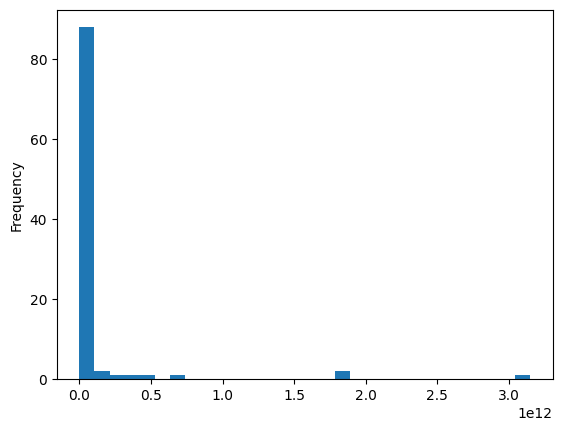

In [ ]:
# checking the GDP spread
dropped_countries["2021 GDP (current US$)"].plot.hist(bins=30)

# most of the dropped countries have a lower GDP

In [ ]:
# this histogram matches the original histogram of GDP
# implies that our dropped data is representative of the original dataframe

<Axes: ylabel='Frequency'>

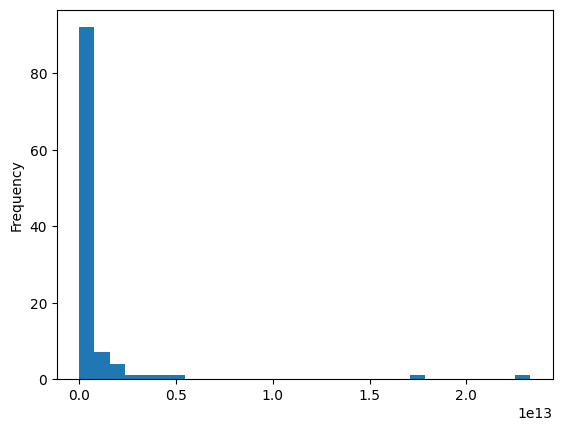

In [ ]:
# for good measure, let's compare the dropped countries to the non-dropped countries

df_allvari_dropna["2021 GDP (current US$)"].plot.hist(bins=30)

In [ ]:
# there is a similar spread
# This implies that our non-dropped countries aren't biased by GDP

<Axes: xlabel='2021 GDP (current US$)', ylabel='total_msw_total_msw_generated_tons_year'>

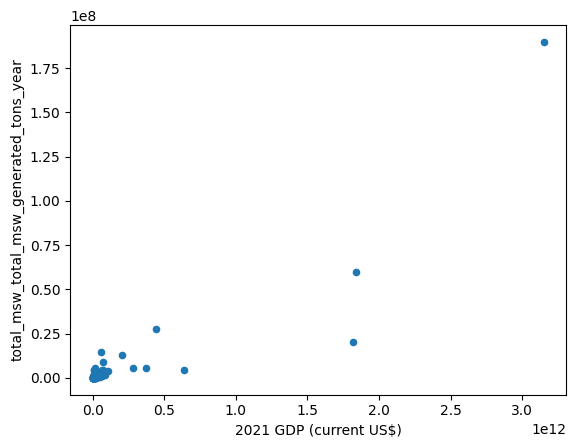

In [ ]:
# finding the GDP distribution with msw generated
dropped_countries.plot.scatter(x = "2021 GDP (current US$)", y = "total_msw_total_msw_generated_tons_year")

# they are mostly concentrated along the lower GDP side
# this is a similar trend we saw in the original dataframe
# again, it implies that our dropped data isn't biased

<Axes: xlabel='2021 GDP (current US$)', ylabel='total_msw_total_msw_generated_tons_year'>

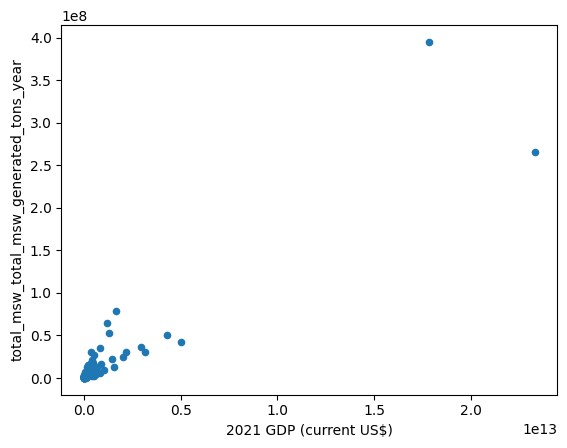

In [ ]:
# let's check it by comparing it to our non-dropped countries
# we see a similar trend, which implies no bias in our dropped countries
df_allvari_dropna.plot.scatter(x = "2021 GDP (current US$)", y = "total_msw_total_msw_generated_tons_year")

<Axes: xlabel='2021 GDP (current US$)', ylabel='EPI Score'>

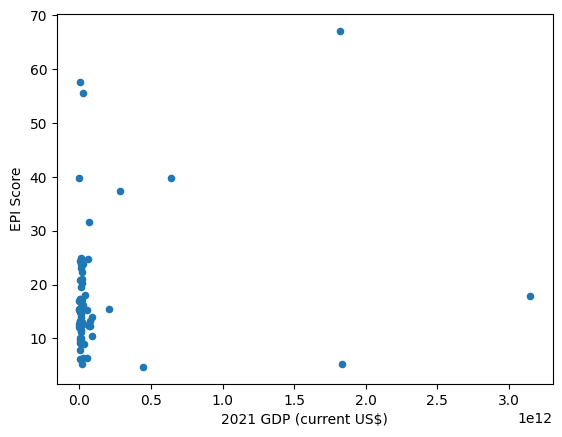

In [ ]:
# lets check with EPI Score
dropped_countries.plot.scatter(x = "2021 GDP (current US$)", y = "EPI Score")

# varies across GDPs
# similar trend to the original dataframe

<Axes: xlabel='2021 GDP (current US$)', ylabel='EPI Score'>

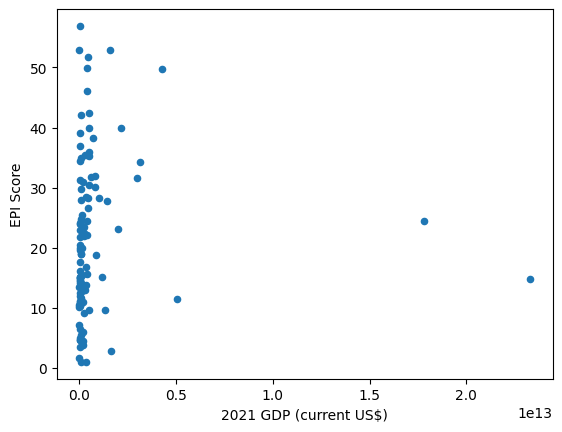

In [ ]:
# again, let's compare to the non-dropped countries

df_allvari_dropna.plot.scatter( x = "2021 GDP (current US$)", y = "EPI Score")

In [ ]:
# the trend looks pretty similar!

In [ ]:
#finally let's look at the dropped vs. non-dropped countries for the per capita variables

<Axes: ylabel='Frequency'>

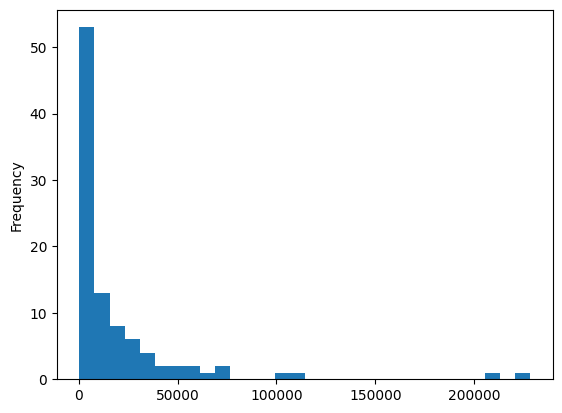

In [ ]:
dropped_countries["GDP Per Capita"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

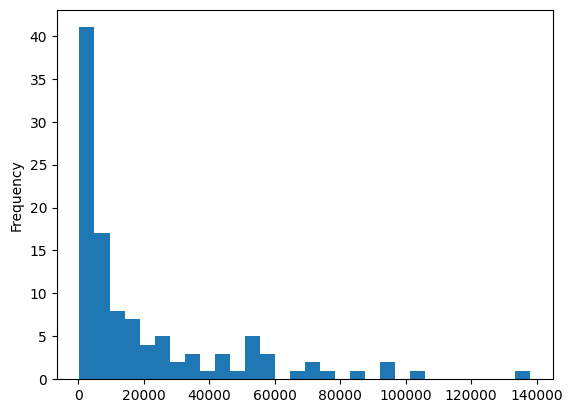

In [ ]:
# Let's compare it to the non-dropped histogram

df_allvari_dropna["GDP Per Capita"].plot.hist(bins=30)

In [ ]:
# these trends look similar -- great!

<Axes: ylabel='Frequency'>

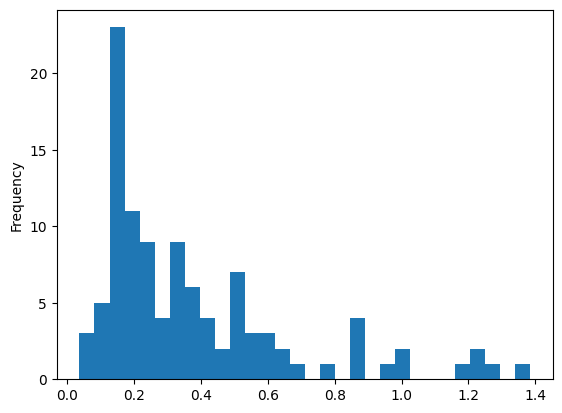

In [ ]:
# Let's look at waste generation per capita in the dropped countries

dropped_countries["Waste Generation Per Capita"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

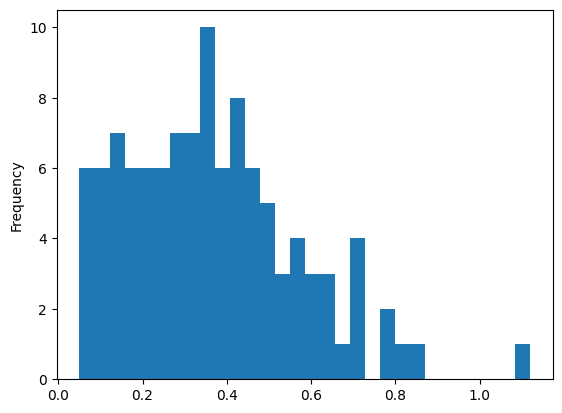

In [ ]:
# and let's compare it to the non-dropped countries

df_allvari_dropna["Waste Generation Per Capita"].plot.hist(bins=30)

In [ ]:
# here the trend is similar, but there might be important differences between the dropped and non-dropped sets


**Regressions**

In [ ]:
# Now let's build out a multivariate regression

import statsmodels.api as sm

In [ ]:
y = df_allvari_dropna['total_msw_total_msw_generated_tons_year']

x = sm.add_constant(df_allvari_dropna[['2021 GDP (current US$)', '% Urban Population (2021)', '2023 Gender Score (0-1)']])

model = sm.OLS(y,x)

# Fit model
model_result = model.fit()

# print results
print(model_result.summary2())

                                 Results: Ordinary least squares
Model:                  OLS                                       Adj. R-squared:       0.855     
Dependent Variable:     total_msw_total_msw_generated_tons_year   AIC:                  3950.5685 
Date:                   2024-04-29 23:44                          BIC:                  3961.3339 
No. Observations:       109                                       Log-Likelihood:       -1971.3   
Df Model:               3                                         F-statistic:          213.6     
Df Residuals:           105                                       Prob (F-statistic):   1.51e-44  
R-squared:              0.859                                     Scale:                3.1070e+14
--------------------------------------------------------------------------------------------------
                              Coef.         Std.Err.      t    P>|t|      [0.025         0.975]   
--------------------------------------------

In [ ]:
# let's build another regression using the per capita variables

y = df_allvari_dropna['Waste Generation Per Capita']

x = sm.add_constant(df_allvari_dropna[['GDP Per Capita', '% Urban Population (2021)', '2023 Gender Score (0-1)']])

model = sm.OLS(y,x)

# Fit model
model_result = model.fit()

# print results
print(model_result.summary2())

                       Results: Ordinary least squares
Model:              OLS                         Adj. R-squared:     0.579    
Dependent Variable: Waste Generation Per Capita AIC:                -125.3027
Date:               2024-04-29 23:44            BIC:                -114.5373
No. Observations:   109                         Log-Likelihood:     66.651   
Df Model:           3                           F-statistic:        50.49    
Df Residuals:       105                         Prob (F-statistic): 2.77e-20 
R-squared:          0.591                       Scale:              0.017891 
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                         -0.4127   0.1639 -2.5179 0.0133 -0.7376 -0.0877
GDP Per Capita                 0.0000   0.0000  5.5376 0.0000  0.0000  0.0000
% Urban P

In [ ]:
# why is all of GDP 0 ???

In [ ]:
# NEW NOTE: I guess we should just delete this huh?
# This portion has notes from the meeting
# AYUSHI something that could be interesting with a multivar reg is to use it as an investigation of interesting policies
# AYUSHI like which countries are doing a good job at their respective vari and where is that model a bad predictor
# AYUSHI what is that country doing policy wise that is making this difference (on notable countries)
# AYU NOTES check for the policies after the results of the multivariate regression. have a little comment that this is a model that might
#suggest the places that might have a good policy or one that might affect the results of the model

# TEAM DECISIONS! (after killing points)
# SOFIA make 4 maps instead of one composite thing

# JEN maybe add to the readme to add to our data sources and specify where we got them and what their methodology is

# DONE = JEN go through the summary of what were left with to understand what we're left with (outlier check)
# DONE = JEN do a little more visual inspection of the outliers and spot checking of notable data

# DONE = JEN specify per capita with GDP and waste (for all of them)
# DONE = JEN replace wherever we used waste generated with per capita


# Mapping

In [ ]:
# geo
import geopandas as gpd

# plotting
from plotnine import *
import plotnine

In [ ]:
! wget https://github.com/envirodatascience/final-project-trashpandas/raw/main/WB_countries_Admin0_10m_newer.zip

--2024-04-29 23:44:27--  https://github.com/envirodatascience/final-project-trashpandas/raw/main/WB_countries_Admin0_10m_newer.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/WB_countries_Admin0_10m_newer.zip [following]
--2024-04-29 23:44:27--  https://raw.githubusercontent.com/envirodatascience/final-project-trashpandas/main/WB_countries_Admin0_10m_newer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6230365 (5.9M) [application/zip]
Saving to: ‘WB_countries_Admin0_10m_newer.zip’

WB_countries_Admin0 100%[===================>]   5.94M  -

In [ ]:
! ls

sample_data  WB_countries_Admin0_10m_newer.zip


In [ ]:
! unzip WB_countries_Admin0_10m_newer.zip

Archive:  WB_countries_Admin0_10m_newer.zip
 extracting: WB_countries_Admin0_10m/WB_countries_Admin0_10m.cpg  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.dbf  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.prj  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.sbn  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.sbx  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp.xml  
  inflating: WB_countries_Admin0_10m/WB_countries_Admin0_10m.shx  


In [ ]:
! ls

sample_data  WB_countries_Admin0_10m  WB_countries_Admin0_10m_newer.zip


In [ ]:
! ls WB_countries_Admin0_10m

WB_countries_Admin0_10m.cpg  WB_countries_Admin0_10m.sbn  WB_countries_Admin0_10m.shp.xml
WB_countries_Admin0_10m.dbf  WB_countries_Admin0_10m.sbx  WB_countries_Admin0_10m.shx
WB_countries_Admin0_10m.prj  WB_countries_Admin0_10m.shp


In [ ]:
world_shape = "WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp"
df_world = gpd.read_file(world_shape)

In [ ]:
df_world.head()

OBJECTID       featurecla  LEVEL               TYPE  \
0         1  Admin-0 country      2  Sovereign country   
1         2  Admin-0 country      2  Sovereign country   
2         3  Admin-0 country      2  Sovereign country   
3         4  Admin-0 country      2  Sovereign country   
4         5  Admin-0 country      2  Sovereign country   

                        FORMAL_EN FORMAL_FR    POP_EST  POP_RANK  GDP_MD_EST  \
0           Republic of Indonesia      None  260580739        17   3028000.0   
1                        Malaysia      None   31381992        15    863000.0   
2               Republic of Chile      None   17789267        14    436100.0   
3  Plurinational State of Bolivia      None   11138234        14     78350.0   
4                Republic of Peru      None   31036656        15    410400.0   

   POP_YEAR  ...     NAME_SV    NAME_TR    NAME_VI NAME_ZH    WB_NAME  \
0      2017  ...  Indonesien  Endonezya  Indonesia   印度尼西亚  Indonesia   
1      2017  ...    Malaysia    Malezya   Malaysia    马来西亚   Malaysia   
2      2017  ...       Chile       Şili      Chile      智利      Chile   
3      2017  ...     Bolivia    Bolivya    Bolivia    玻利維亞    Bolivia   
4      2017  ...        Peru       Peru       Peru      秘鲁       Peru   

  WB_RULES WB_REGION  Shape_Leng  Shape_Area  \
0     None       EAP  495.029918  153.078608   
1     None       EAP   68.456913   26.703172   
2     None       LCR  416.997272   76.761813   
3     None       LCR   54.345991   92.203587   
4     None       LCR   73.262192  106.417089   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  
1  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...  
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...  

[5 rows x 53 columns]

In [ ]:
df_world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    251 non-null    int64   
 1   featurecla  251 non-null    object  
 2   LEVEL       251 non-null    int64   
 3   TYPE        251 non-null    object  
 4   FORMAL_EN   229 non-null    object  
 5   FORMAL_FR   5 non-null      object  
 6   POP_EST     251 non-null    int64   
 7   POP_RANK    251 non-null    int64   
 8   GDP_MD_EST  251 non-null    float64 
 9   POP_YEAR    251 non-null    int64   
 10  LASTCENSUS  251 non-null    int64   
 11  GDP_YEAR    251 non-null    int64   
 12  ECONOMY     251 non-null    object  
 13  INCOME_GRP  251 non-null    object  
 14  FIPS_10_    251 non-null    object  
 15  ISO_A2      251 non-null    object  
 16  ISO_A3      251 non-null    object  
 17  ISO_A3_EH   251 non-null    object  
 18  ISO_N3      251 non-null    object  
 19  

<Axes: >

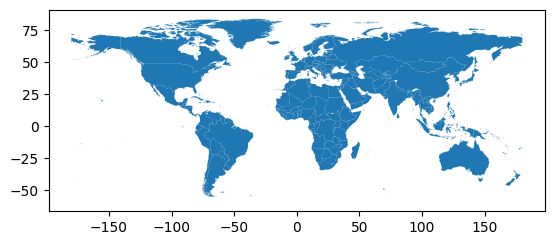

In [ ]:
#check that the map works
df_world.plot()

In [ ]:
#Pretty sure that ISO A3 is the formal name for the country codes that we've been working with. Let's take a look
df_world.ISO_A3.head(10)

0    IDN
1    MYS
2    CHL
3    BOL
4    PER
5    ARG
6    CYP
7    IND
8    CHN
9    ISR
Name: ISO_A3, dtype: object

In [ ]:
#Looks reasonable - now will add in data points to map from the allvari df'
df_mapdata = pd.merge(df_world, df_allvari[['country_code', 'GDP Per Capita', '% Urban Population (2021)', '2023 Gender Score (0-1)', 'EPI Score', 'Waste Generation Per Capita']], left_on = 'ISO_A3', right_on = 'country_code', how = 'left')

In [ ]:
df_mapdata.head()

OBJECTID       featurecla  LEVEL               TYPE  \
0         1  Admin-0 country      2  Sovereign country   
1         2  Admin-0 country      2  Sovereign country   
2         3  Admin-0 country      2  Sovereign country   
3         4  Admin-0 country      2  Sovereign country   
4         5  Admin-0 country      2  Sovereign country   

                        FORMAL_EN FORMAL_FR    POP_EST  POP_RANK  GDP_MD_EST  \
0           Republic of Indonesia      None  260580739        17   3028000.0   
1                        Malaysia      None   31381992        15    863000.0   
2               Republic of Chile      None   17789267        14    436100.0   
3  Plurinational State of Bolivia      None   11138234        14     78350.0   
4                Republic of Peru      None   31036656        15    410400.0   

   POP_YEAR  ...  WB_REGION  Shape_Leng  Shape_Area  \
0      2017  ...        EAP  495.029918  153.078608   
1      2017  ...        EAP   68.456913   26.703172   
2      2017  ...        LCR  416.997272   76.761813   
3      2017  ...        LCR   54.345991   92.203587   
4      2017  ...        LCR   73.262192  106.417089   

                                            geometry country_code  \
0  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...          IDN   
1  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...          MYS   
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...          CHL   
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...          BOL   
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...          PER   

  GDP Per Capita % Urban Population (2021) 2023 Gender Score (0-1) EPI Score  \
0    4544.005239                    57.290                   0.697      15.2   
1   12367.070336                    77.696                   0.682      22.1   
2   18811.140619                    87.817                   0.777       1.0   
3    3767.573252                    70.475                   0.730      34.4   
4    7222.918125                    78.500                   0.764       9.2   

  Waste Generation Per Capita  
0                    0.249698  
1                    0.429492  
2                    0.387238  
3                    0.206910  
4                    0.269803  

[5 rows x 59 columns]

In [ ]:
df_mapdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   OBJECTID                     251 non-null    int64   
 1   featurecla                   251 non-null    object  
 2   LEVEL                        251 non-null    int64   
 3   TYPE                         251 non-null    object  
 4   FORMAL_EN                    229 non-null    object  
 5   FORMAL_FR                    5 non-null      object  
 6   POP_EST                      251 non-null    int64   
 7   POP_RANK                     251 non-null    int64   
 8   GDP_MD_EST                   251 non-null    float64 
 9   POP_YEAR                     251 non-null    int64   
 10  LASTCENSUS                   251 non-null    int64   
 11  GDP_YEAR                     251 non-null    int64   
 12  ECONOMY                      251 non-null    object  
 1

In [ ]:
#color code map of the world with several variables

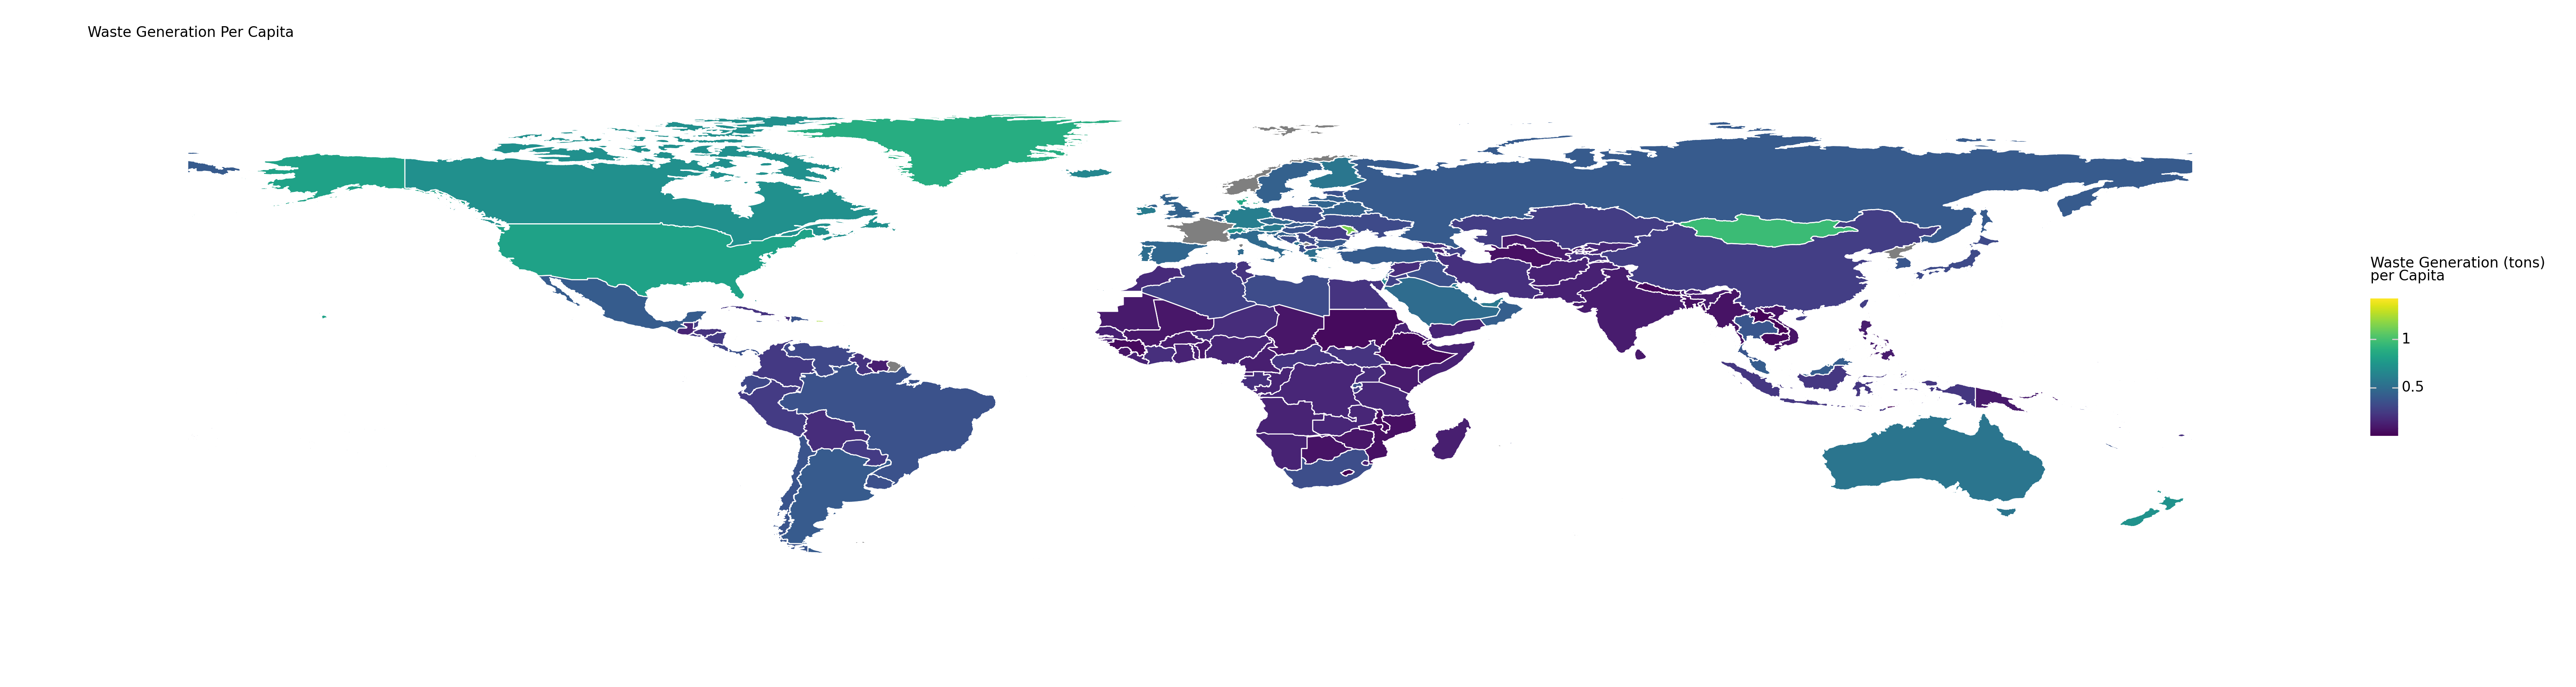

<Figure Size: (3000 x 800)>

In [ ]:
plotnine.options.figure_size = (30, 8)


(ggplot()
 + geom_map(df_mapdata, aes(geometry = 'geometry', fill='Waste Generation Per Capita'), color='white')
  + labs(fill='Waste Generation (tons) \nper Capita')
  +ggtitle('Waste Generation Per Capita')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
 )

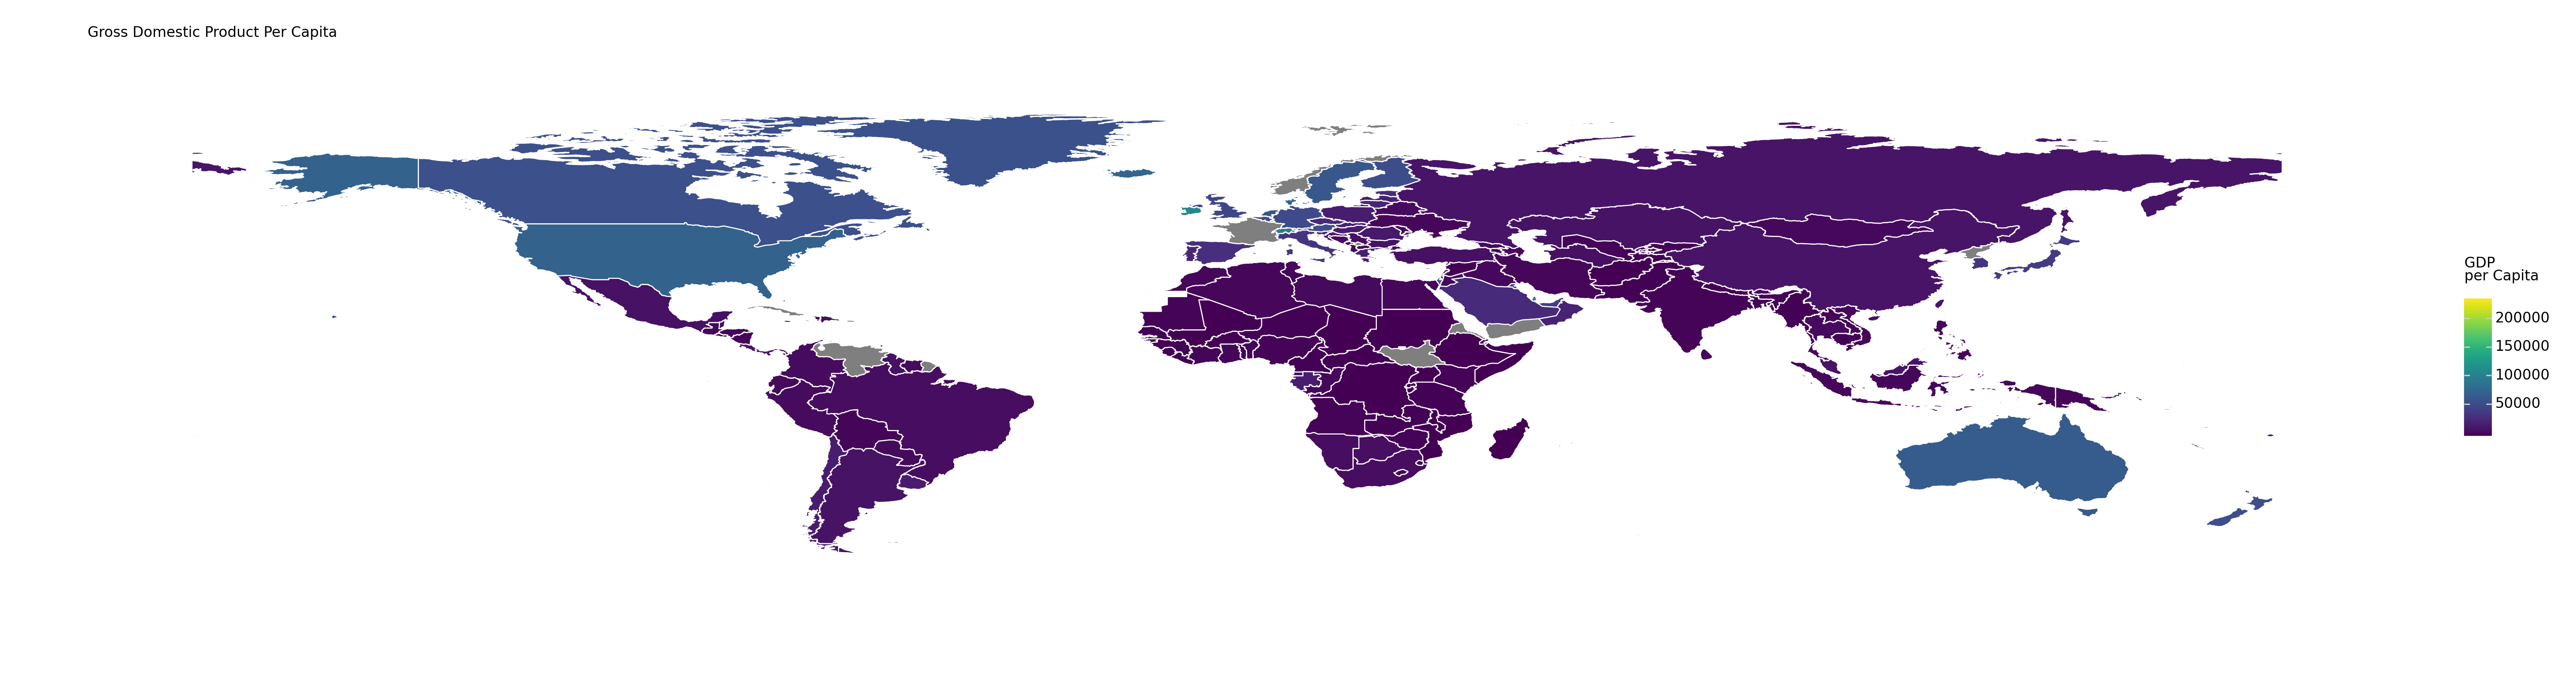

<Figure Size: (3000 x 800)>

In [ ]:
plotnine.options.figure_size = (30, 8)


(ggplot()
 + geom_map(df_mapdata, aes(geometry = 'geometry', fill='GDP Per Capita'), color='white')
  + labs(fill='GDP \nper Capita')
  +ggtitle('Gross Domestic Product Per Capita')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
 )

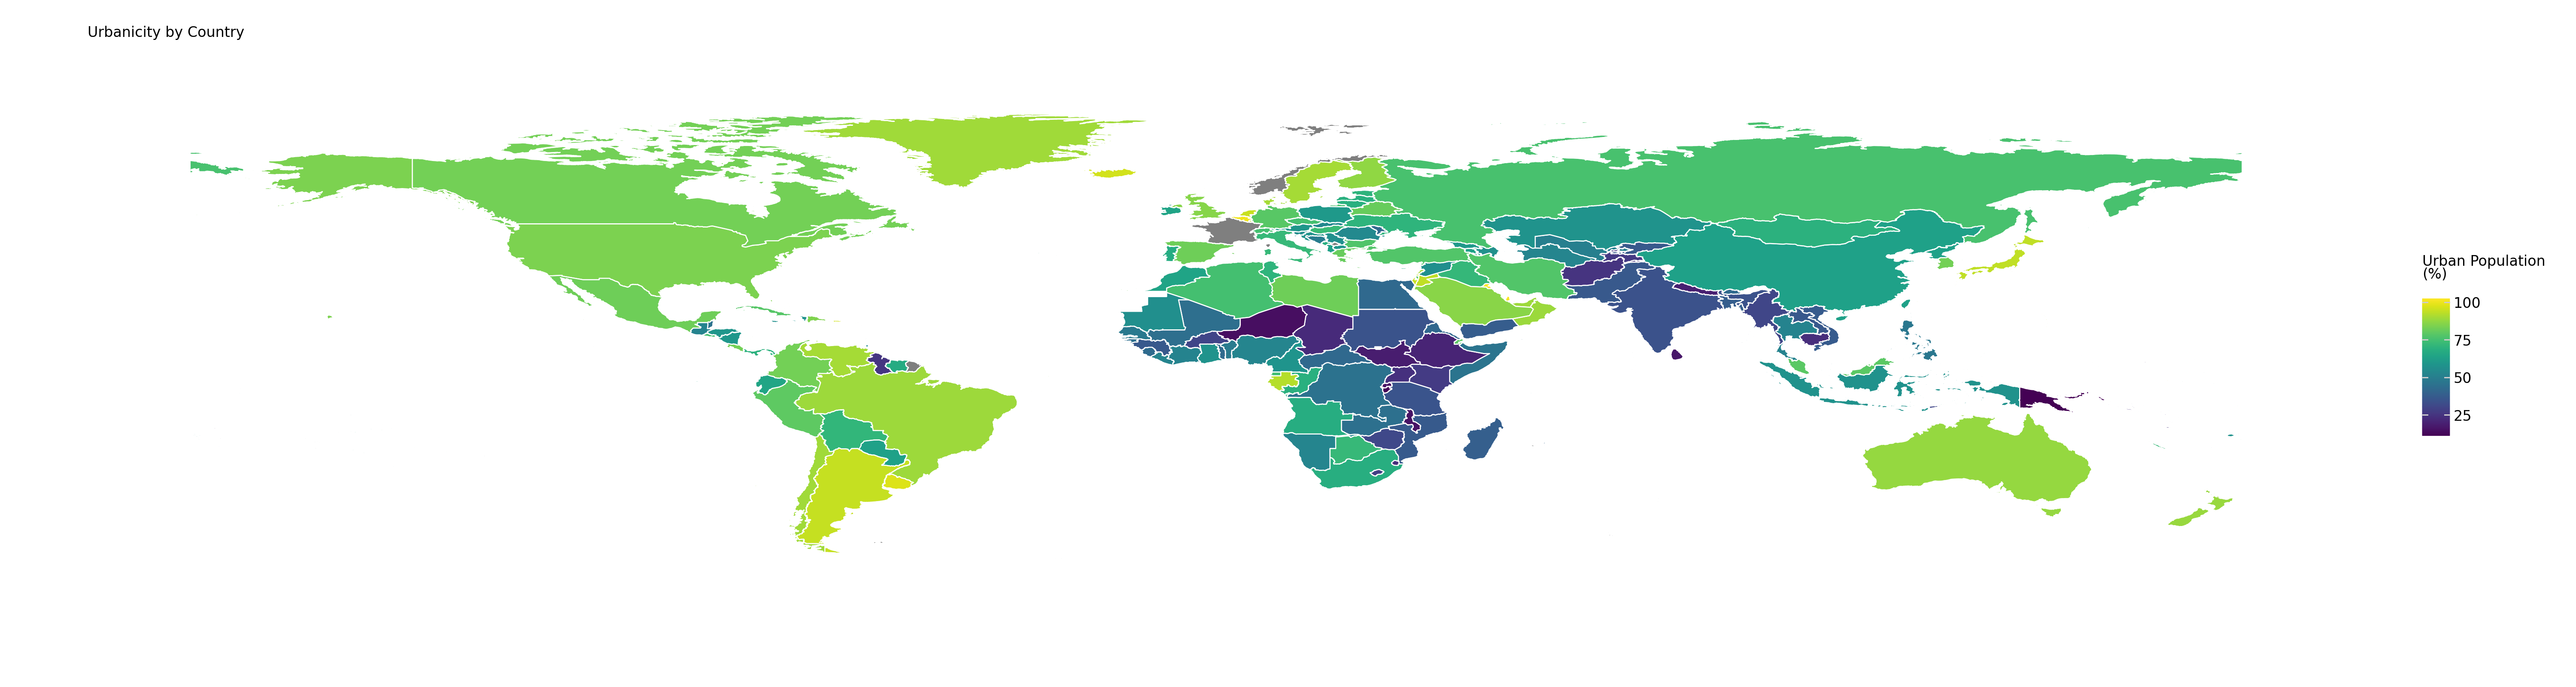

<Figure Size: (3000 x 800)>

In [ ]:
plotnine.options.figure_size = (30, 8)


(ggplot()
 + geom_map(df_mapdata, aes(geometry = 'geometry', fill='% Urban Population (2021)'), color='white')
  + labs(fill='Urban Population \n(%)')
  +ggtitle('Urbanicity by Country')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
)

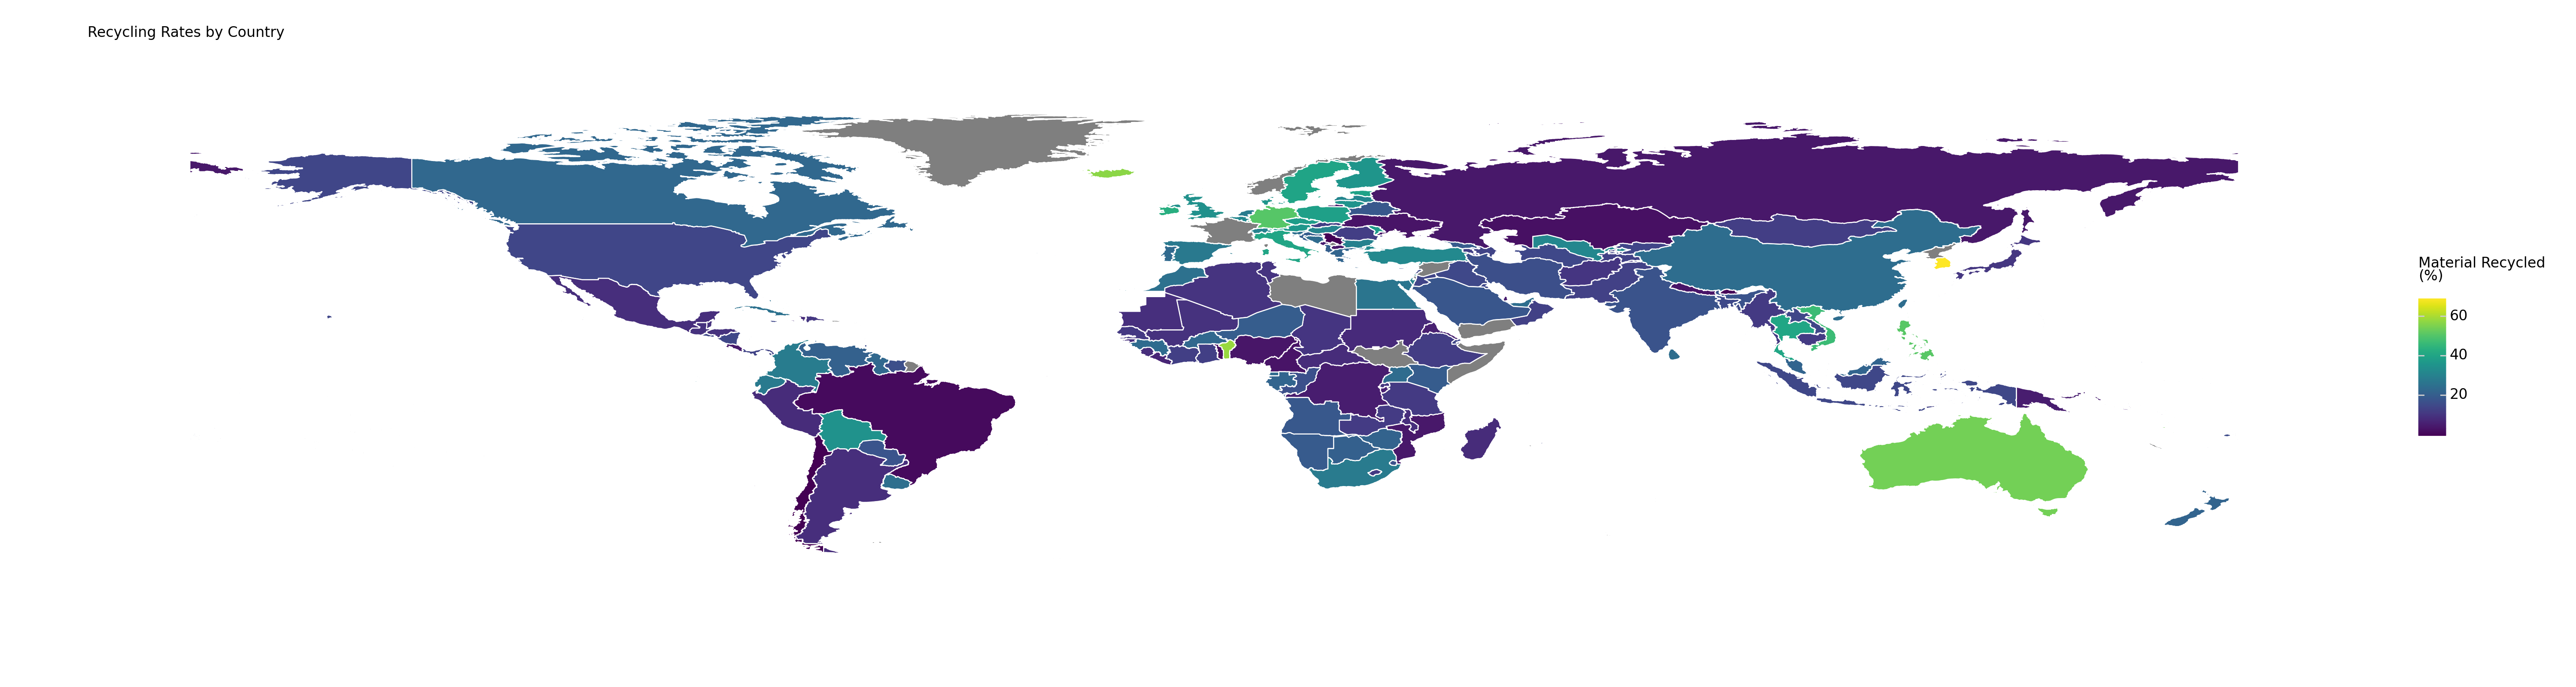

<Figure Size: (3000 x 800)>

In [ ]:
plotnine.options.figure_size = (30, 8)


(ggplot()
 + geom_map(df_mapdata, aes(geometry = 'geometry', fill='EPI Score'), color='white')
  + labs(fill='Material Recycled \n(%)')
  +ggtitle('Recycling Rates by Country')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
)

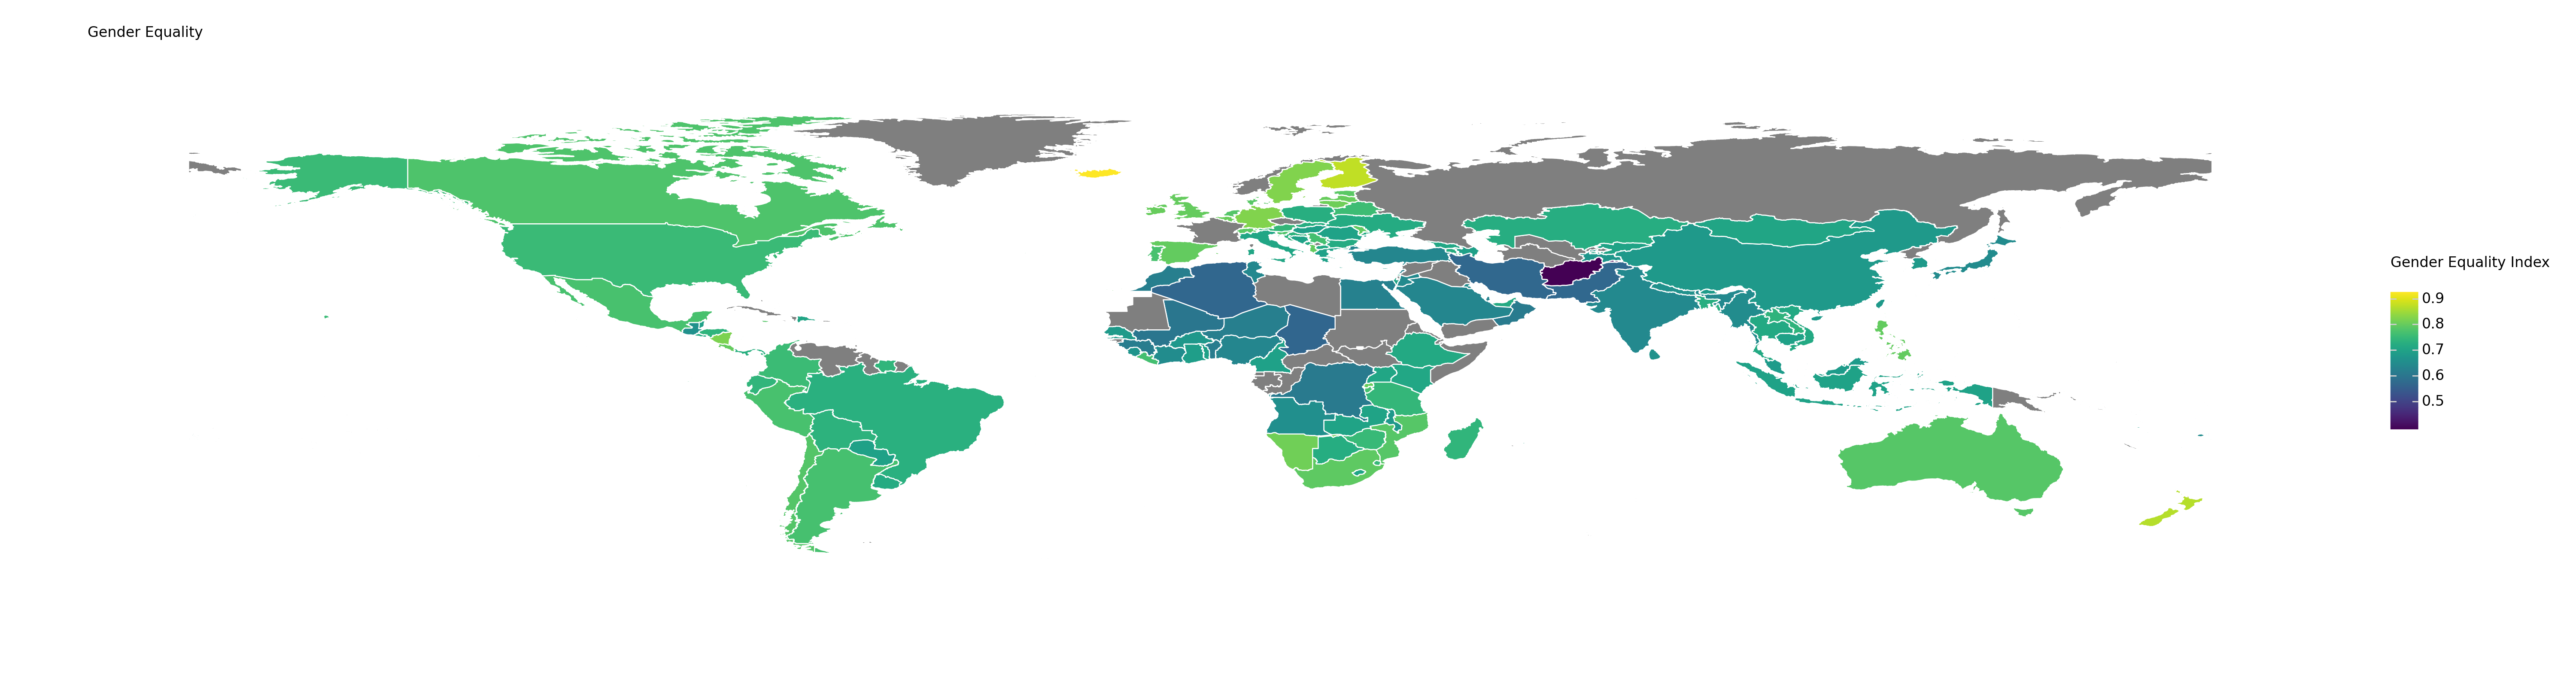

<Figure Size: (3000 x 800)>

In [ ]:
plotnine.options.figure_size = (30, 8)


(ggplot()
 + geom_map(df_mapdata, aes(geometry = 'geometry', fill='2023 Gender Score (0-1)'), color='white')
  + labs(fill='Gender Equality Index')
  +ggtitle('Gender Equality')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
 )

# Research findings
We can note a similar trend across all of our datasets - waste generation is affected by all the variables that we considered in our research question, which was proved by the fact that all our stats tests had very low p-values and were significant. Our heat maps also show similar trends across all the maps, proving the correlation. Our regressions prove that total waste generated in tonnes has a negative relationship with our variables, and the per capita waste generation has a slightly positive affect with the scores for the chosen variables as well.


**Policy perspectives**

One notable trend is that the European countries have a higher value index across all the variables but has a relatively lower waste generation per capita. This is because the EU has several targets and policies (ranging from binding regulatory instruments to non-binding social behaviours) for optimizing waste management and increasing recycling rates. The Waste Framework Directive is a collective agreement amongst the entire European Union which defines basic concepts related to waste management and their principles and goals to achieve. The Waste Electrical and Electronic Equipment (WEEE) Directive sets targets for dealing with electronic waste, and the Packaging Waste Directive defines targets for managing and recycling packaging waste.

South Korea also boasts a very high recycling rate. This is due to its Waste Management Law in 1986, a practical step to achieving a no-waste country. Additional policies implemented in the country include the Volume-based Waste Fee (VBWF) and Pay As Your Trash which requires citizens to pay for the amount of trash they produce and sort it accordingly (hence incentivizing low household waste generation). There is also the Extended Producer Responsibility which requires companies to be responsible for the trash and waste that they produce.

We hence also conclude that our model can be used as a good determining factor as to whether the waste management policies in certain countries are well defined and regulated.


Sources:

https://www.google.com/url?q=https://environment.ec.europa.eu/topics/waste-and-recycling/waste-framework-directive_en&sa=D&source=docs&ust=1714435326342583&usg=AOvVaw39P3mr2w3G-JQIgpqYc2C2

https://greeneration.org/en/publication/green-info/south-koreas-waste-management-system/
